<a href="https://colab.research.google.com/github/jitendra423/almabetter_project/blob/main/NYC_TAXI_TRIP_DURATION_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='#FF3206'>**Project Name**    - <font color='#3792cb'>NYC TAXI TRIP DURATION PREDICTION

##### <font size='5px'>**Project Type**    - **Supervised Machine Learning**
##### **Contribution**    - Individual
##### **Name**    - Jitendra Kumar

# **Project Summary -**

New York City’s 12,779 yellow medallion taxicabs comprise a $1.8 billion industry serving about 240 million passengers a year. Information on New York’s cabs attracts a broad audience due to their central transportation role and their prominence in Manhattan traffic. Exploiting an understanding of taxi trip durations and the ability to predict taxi durations could present valuable insights to city planners and the people of New York. Hence, this problem statement is of great significance.

# Data fields

● id - a unique identifier for each trip

● vendor_id - a code indicating the provider associated with the trip record

● pickup_datetime - date and time when the meter was engaged

● dropoff_datetime - date and time when the meter was disengaged

● passenger_count - the number of passengers in the vehicle (driver entered value)

● pickup_longitude - the longitude where the meter was engaged

● pickup_latitude - the latitude where the meter was engaged

● dropoff_longitude - the longitude where the meter was disengaged

● dropoff_latitude - the latitude where the meter was disengaged

● store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

● trip_duration - duration of the trip in seconds

# ***Let's Begin !***

### Import Librarires

In [ ]:
# import librarires.
import numpy as np
import pandas as pd
from numpy import math
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
import seaborn as sns
from datetime import datetime
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
# install haversine module for calculate distance.
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from haversine import haversine

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Data

In [ ]:
# Import data
data=pd.read_csv('/content/drive/MyDrive/Jitu/NYC Taxi Data.csv')
data

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

## Know Your Data

### Dataset  View

In [ ]:
# first five data
data.head(5)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [ ]:
# last five data
data.tail(5)

id  vendor_id      pickup_datetime     dropoff_datetime  \
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198

### Shape of the data

In [ ]:
# shape of the data
data.shape

(1458644, 11)

### Dataset Rows & Columns count

### Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


### Duplicate Values

In [ ]:
# duplicated data
print(f'findout duplicate data in entire data {data.duplicated().sum()}')

findout duplicate data in entire data 0


### Missing Data

In [ ]:
# find out missing data
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

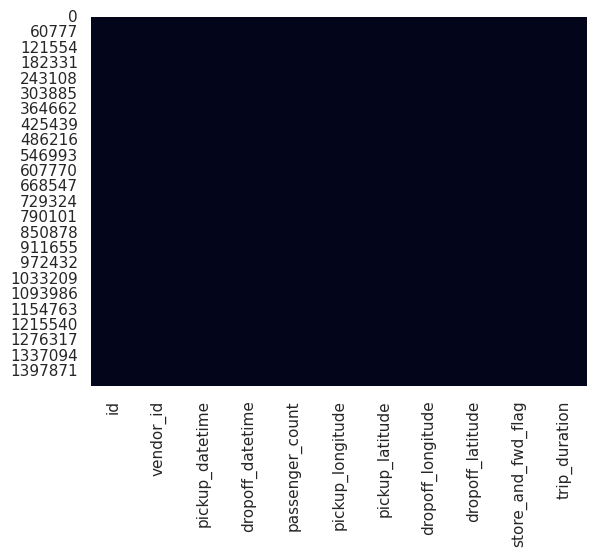

In [ ]:
# Visualizing the missing values for restaurant
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False);

You can see in above heatmap graph. any missing data have not out data.

### Data Type 

In [ ]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

### What do You Know about data

1. Pickup_datetime and Dropoff_datetime featres are object datatype instead of date time object.
2. In my data have not null values.
3. In my data have not any duplicate data.


## EDA

### Univariate Analysis

#### Chart 1. Distribution Graph

<ipython-input-14-1b3f6ddb9c02>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['trip_duration'],color="b").set(title='Distribution Plot for Trip Duration')


[Text(0.5, 1.0, 'Distribution Plot for Trip Duration')]

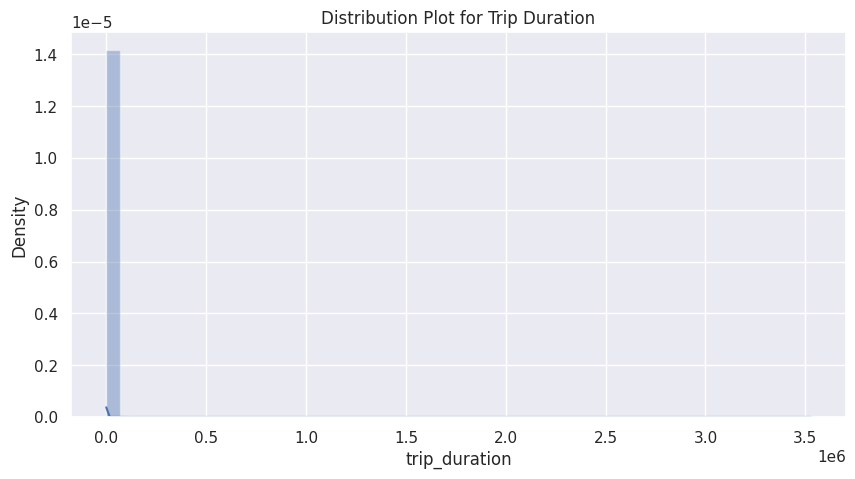

In [ ]:
#Dependent variable 'trip_duration'
plt.figure(figsize=(10,5))
sns.distplot(data['trip_duration'],color="b").set(title='Distribution Plot for Trip Duration')

<ipython-input-15-28021b311a1d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(data['trip_duration']),color="red").set(title='Distribution Plot with Log Transformation for Trip Duration')


[Text(0.5, 1.0, 'Distribution Plot with Log Transformation for Trip Duration')]

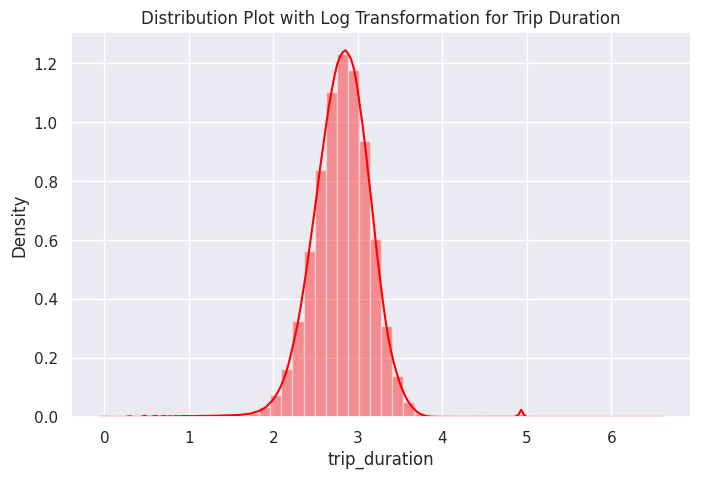

In [ ]:
# you can see in above graph the trip duration distribution is not norma distribution.
# apply the log method for normal distribution on the trip duaration.
plt.figure(figsize=(8,5))
sns.distplot(np.log10(data['trip_duration']),color="red").set(title='Distribution Plot with Log Transformation for Trip Duration')

#### Chrt 2. Box Plot

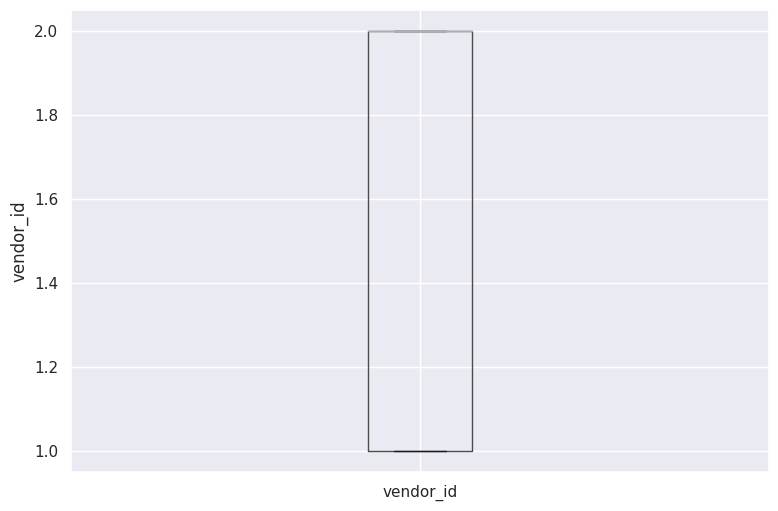

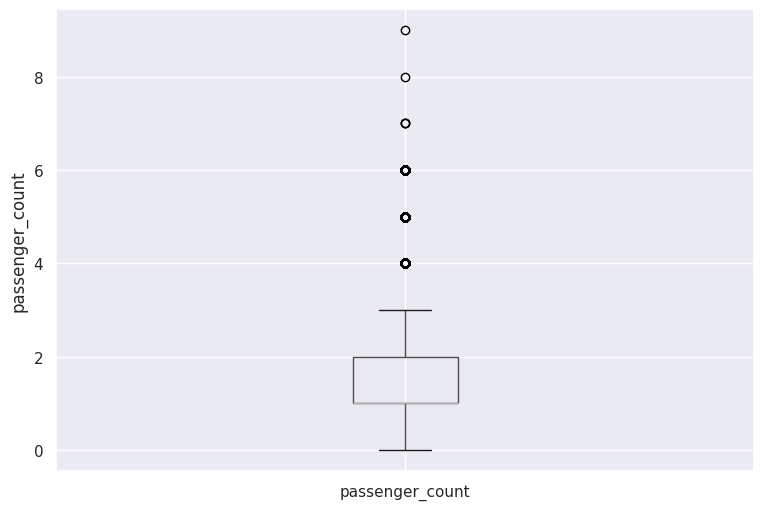

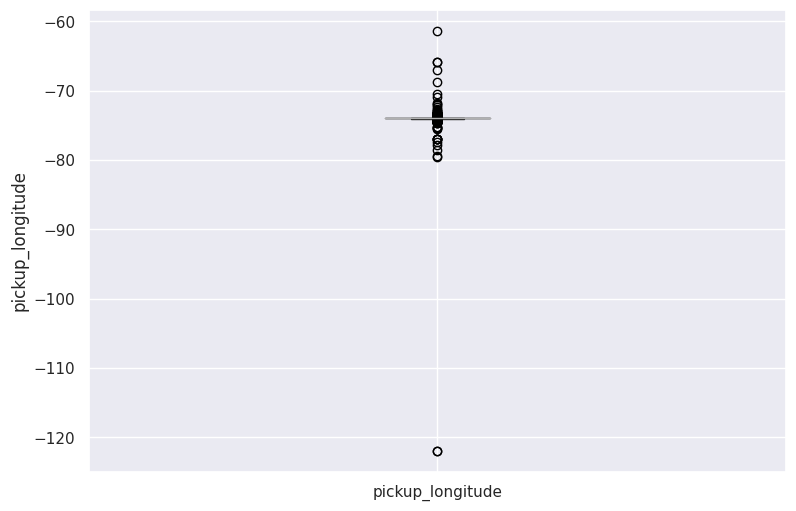

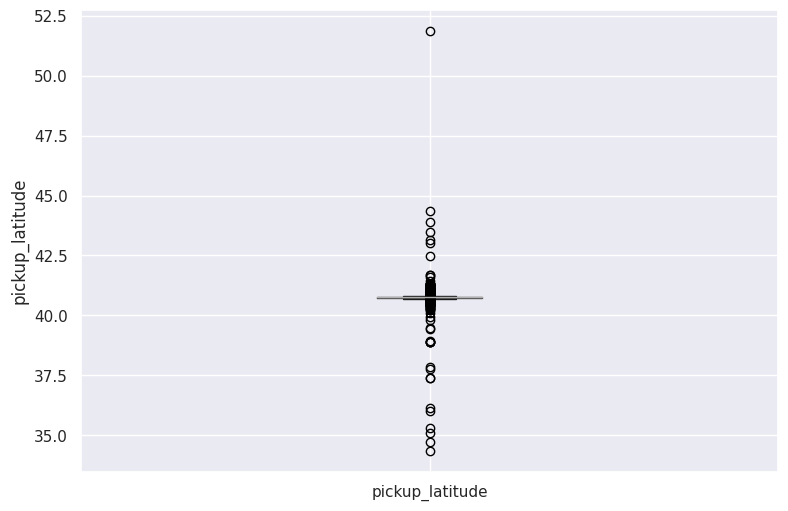

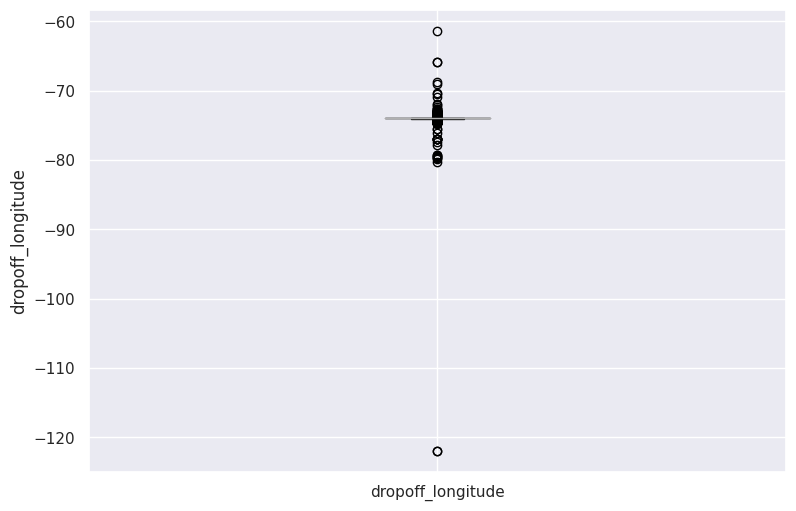

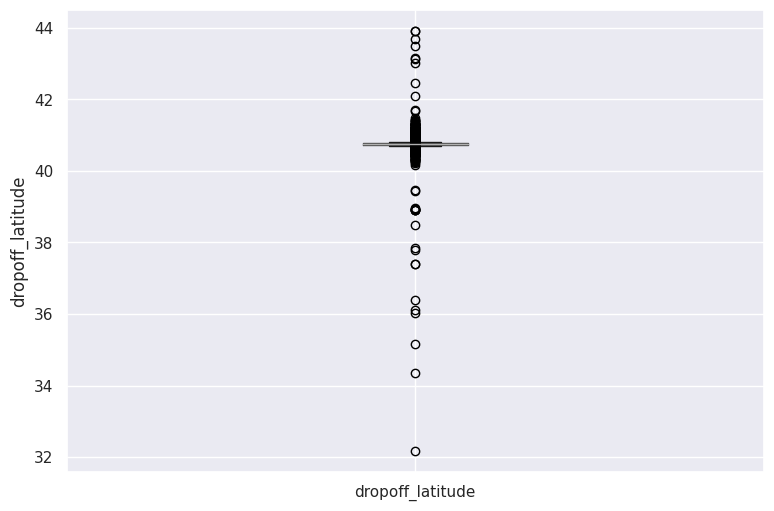

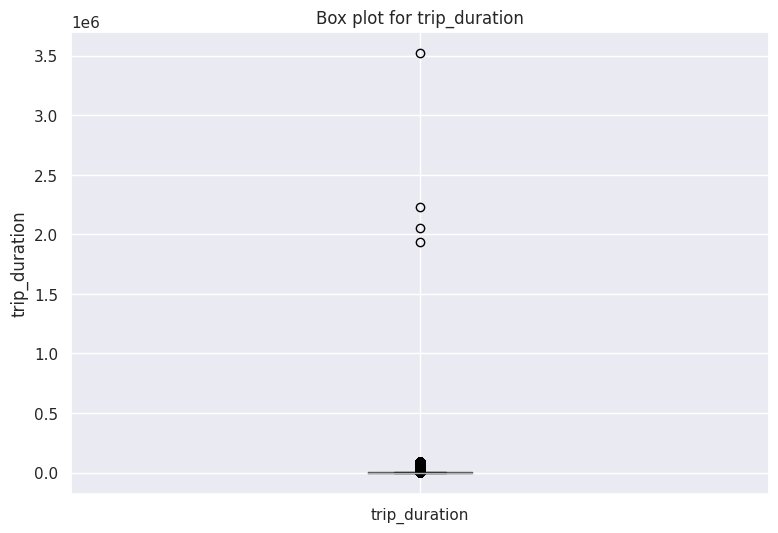

In [ ]:
# plot a boxplot for the label by each numerical feature  
for col in data.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  data.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.title("Box plot for trip_duration")
plt.show()

#### conclusion

Vendor ID has no outlier.

In passenger count 4 and more passengers are being treated as outliers.

pickup_longitude and pickup_latitude has outliers as well.

dropoff_longitude and dropoff_latitude has outliers too.

Our target variable trip_duration has alot of outliers

### check out consistency of our target variable or not

Checking consitency of trip_duration

from the box plot we see that there are few outlier having very large value. we have to remove those outlier. but first let check the consitency of feature "trip duration". To do so we calculate the difference between pick and dropoff time.

In [ ]:
# change dtype of pickup_datetime and dropoff_datetime for further any operation.
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [ ]:
# creating a function that will out trip duration from pick and dropoff time
def calculate_trip_duration(pickup,dropoff):
  return (dropoff-pickup).total_seconds()

In [ ]:
# apply above define funtion on pickup_datetime and dropoff time using lamda funtion.
# creating a feature which stores this calculated trip duration
data['calculate_trip_duration']=data.apply(lambda x:calculate_trip_duration(x['pickup_datetime'],x['dropoff_datetime']),axis=1)
data['calculate_trip_duration']

0           455.0
1           663.0
2          2124.0
3           429.0
4           435.0
            ...  
1458639     778.0
1458640     655.0
1458641     764.0
1458642     373.0
1458643     198.0
Name: calculate_trip_duration, Length: 1458644, dtype: float64

In [ ]:
# checking for consistency by comparing trip duration with calculated trip duration
(data['calculate_trip_duration']==data['trip_duration']).value_counts()

True    1458644
dtype: int64

Here, we see that there the trip duration is consistent with the calculated trip duration. so, this large value are purely an outlier.

In [ ]:
# Dropping the feature created 
data.drop(['calculate_trip_duration'],axis=1,inplace=True)

### chart 3. Bar Graph on Target Variable Using Diffrent Diffrent Catgories.

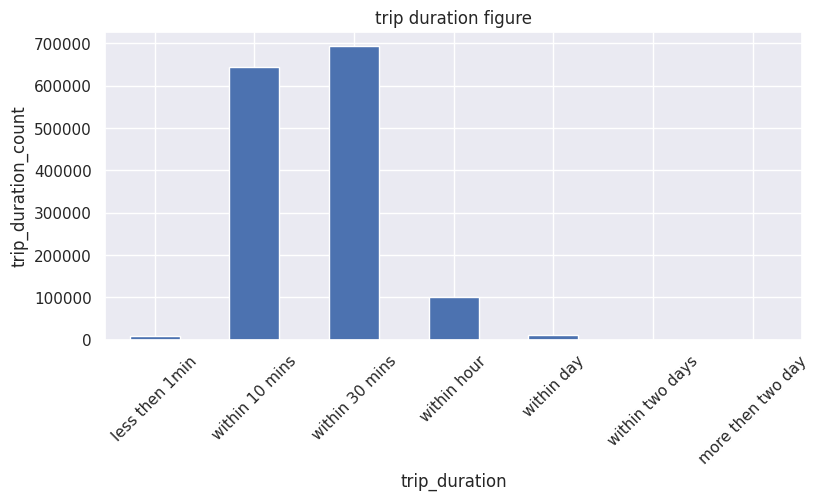

In [ ]:
plt.figure(figsize=(9,4))
lb=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']
data.groupby(pd.cut(data['trip_duration'],bins=[0,60,600,1800,3600,86400,172800,10000000],labels=lb))['trip_duration'].count().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('trip duration figure')
plt.ylabel('trip_duration_count')
plt.show()

#### conclusion

1. users provide minimum trip duration less then 1 mins,within day.
2. users provide maximum trip duration from within 10 mins to within 30 mins.

### Histogram using mean and median.

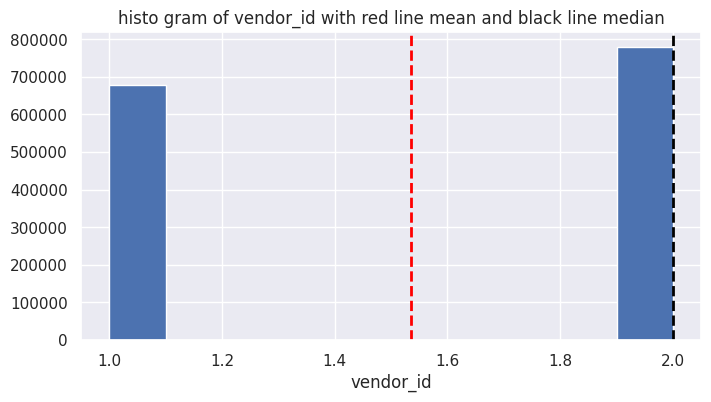

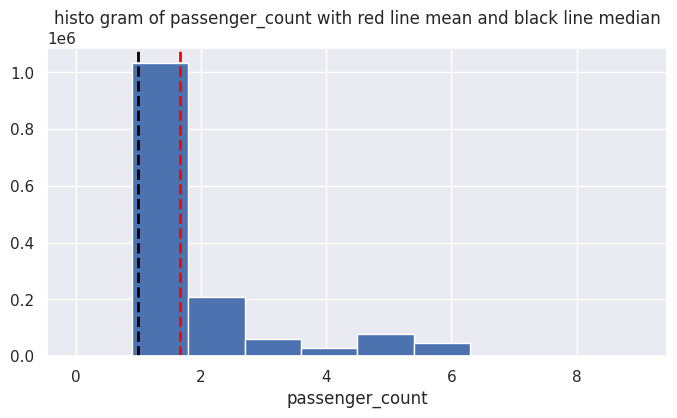

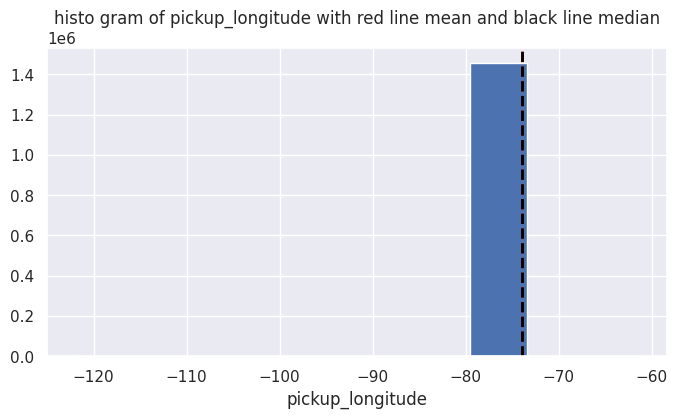

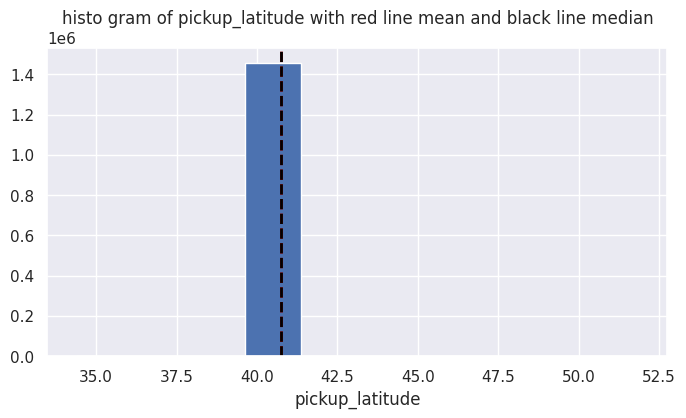

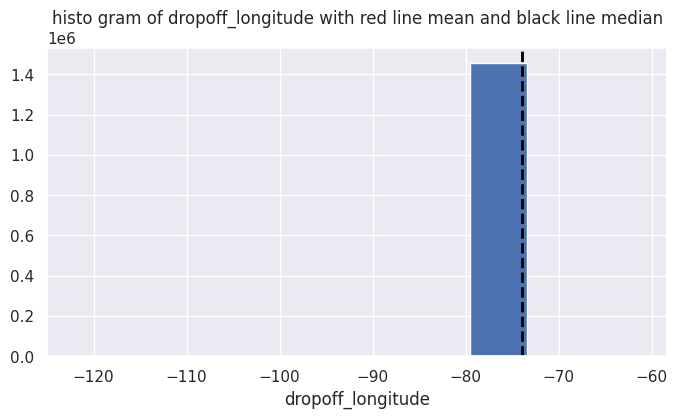

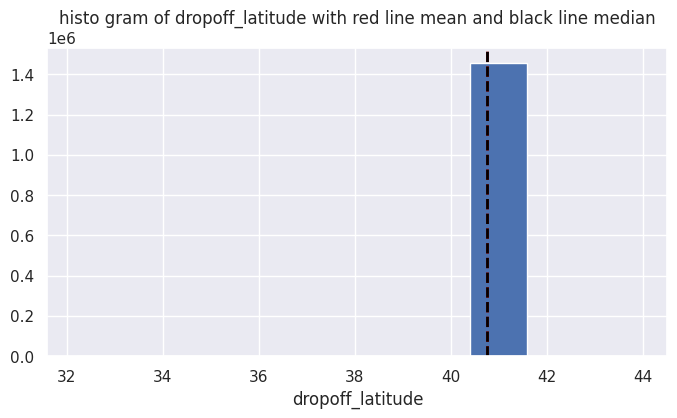

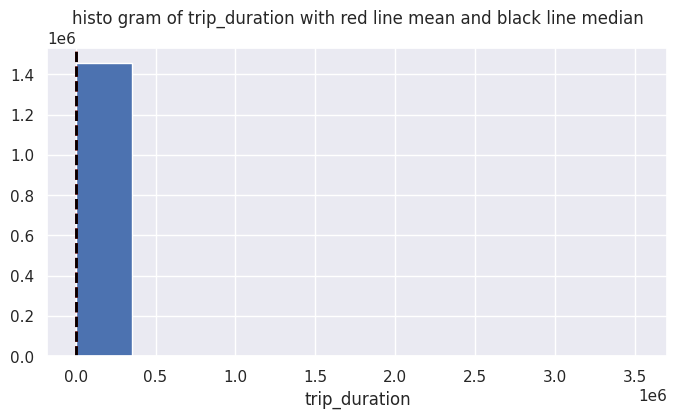

In [ ]:
# select numerical features.
# apply histogram on numerical features with mean and median line.
numeric_features = data.describe().columns
for i in numeric_features:
  fg=plt.figure(figsize=(8,4))
  ax=fg.gca()
  f=data[i]
  f.hist(bins=10,ax=ax)
  plt.axvline(f.mean(),linewidth=2,color='red',linestyle='dashed')
  plt.axvline(f.median(),linewidth=2,color='black',linestyle='dashed')
  plt.title(f'histo gram of {i} with red line mean and black line median')
  plt.xlabel(i)
plt.show()

### chart 4. Correlation Plot Using ScatterPlot

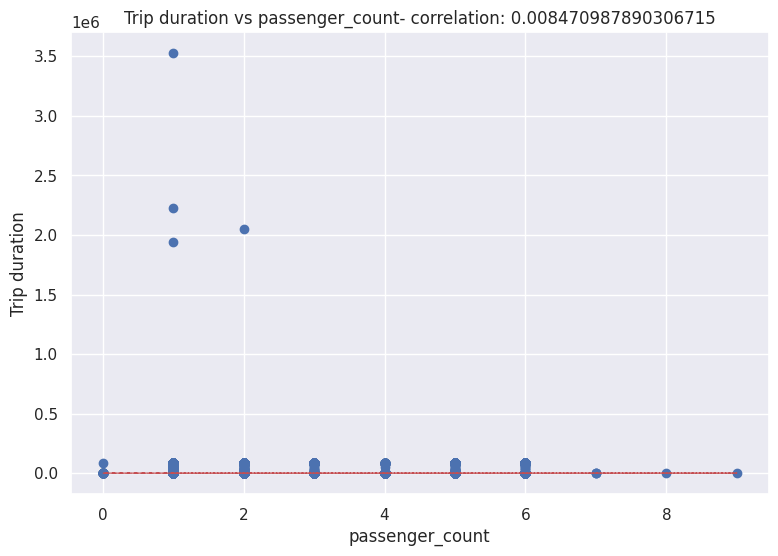

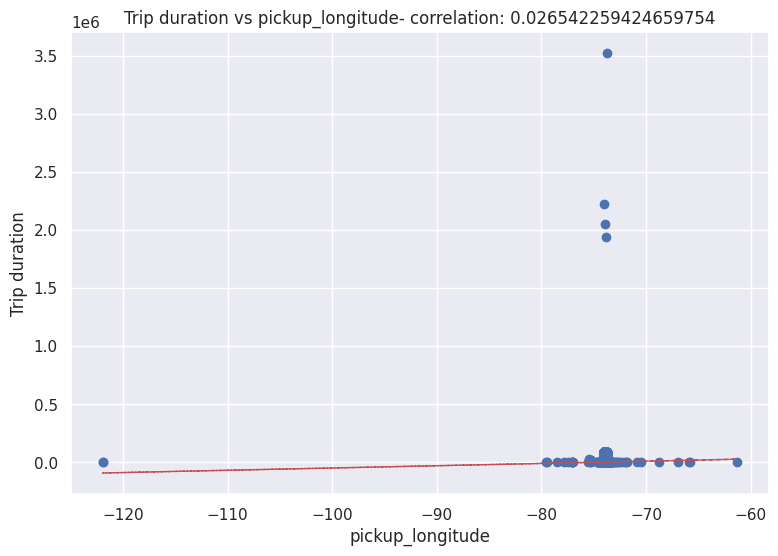

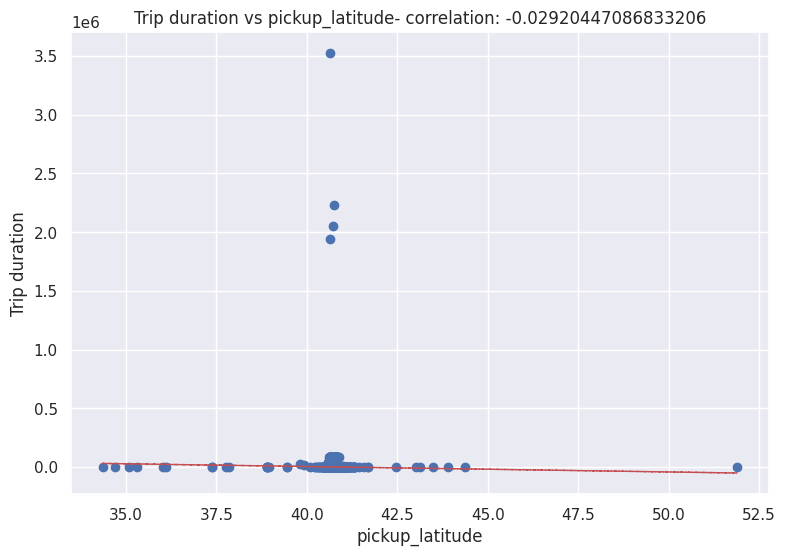

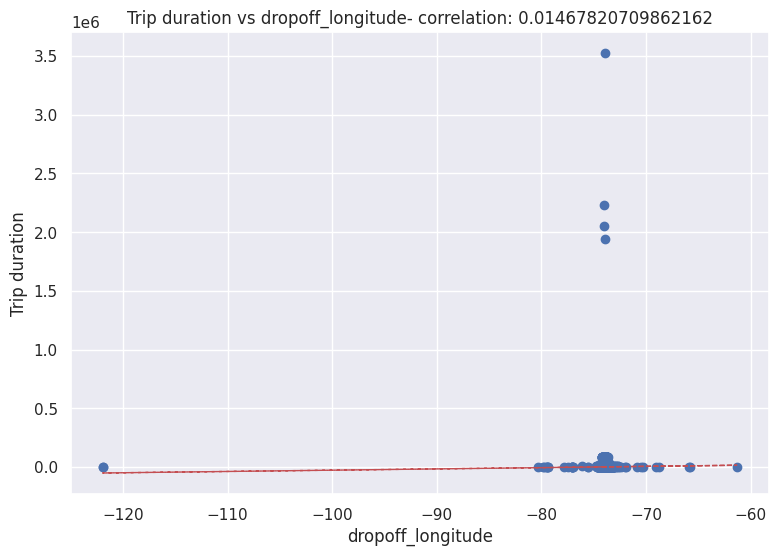

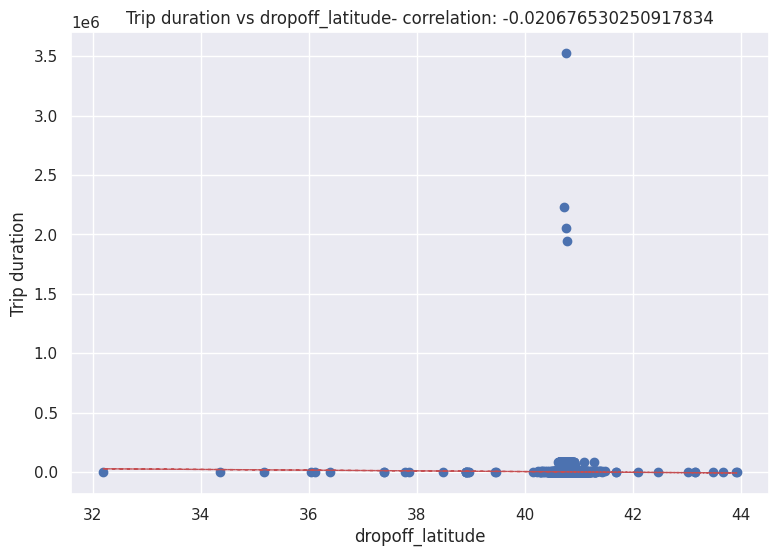

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip duration')
    ax.set_title('Trip duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['trip_duration'], 1)
    y_hat = np.poly1d(z)(data[col])
    
    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

### chart 5. Count Plot

<Axes: xlabel='vendor_id', ylabel='count'>

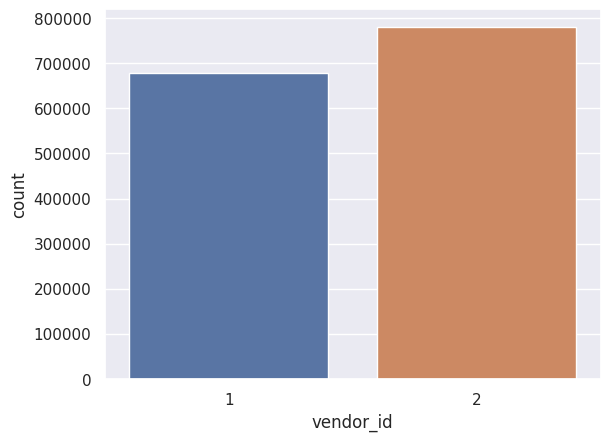

In [ ]:
#Distribution of the vendor id for the taxi trip
sns.countplot(x='vendor_id',data=data)

#### Conclusion

Though both the vendors seems to have almost equal market share. 
But Vendor 1 is evidently more famous among the population as per the above graph.

<a id=map></a>
# Map Visualization
***
We shall visualize the Taxi pickup locations by placing long and lat marker on the MAP of the US. So that we can analyze below questions:
 - Are all pickups constrained to NYC and it's surrounding areas?
 - Is there any unusual location of the pickup?
 - Are the lat long constrained to the land area of the US and nowhere else?

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


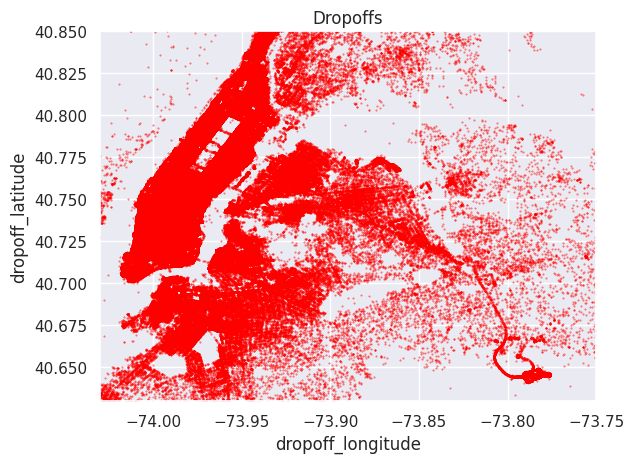

In [ ]:
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

data.plot(kind='scatter', x='dropoff_longitude',y='dropoff_latitude',
          color='Red',
          s=0.2, alpha =.6)
plt.title('Dropoffs')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

(-74.03, -73.75)

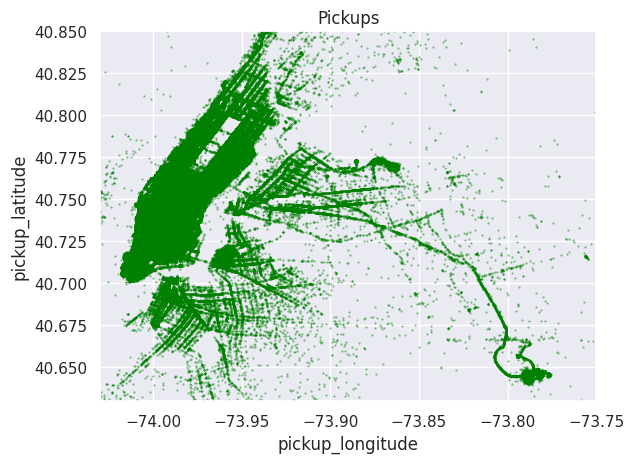

In [ ]:
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

data.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude',
          color='green',
          s=0.2, alpha =.6)
plt.title('Pickups')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

<a id=Folium></a>
## Folium
***

In [ ]:
import folium
nyc = folium.Map(location=[40.730610,-73.935242],zoom_start=12, control_scale=True)
nyc

# FEATURE ENGINEERING

Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

In [ ]:
data.head(5)

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [ ]:
#Calculate and assign new columns to the dataframe such as pickupday,
#dropoffday which will help us to gain more insights from the data.
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_day dropoff_day  
0         40.765602                  N            455     Monday      Monday  
1         40.731152                  N            663     Sunday      Sunday  
2         40.710087                  N           2124    Tuesday     Tuesday  
3         40.706718                  N            429  Wednesday   Wednesday  
4         40.782520                  N            435   Saturday    Saturday

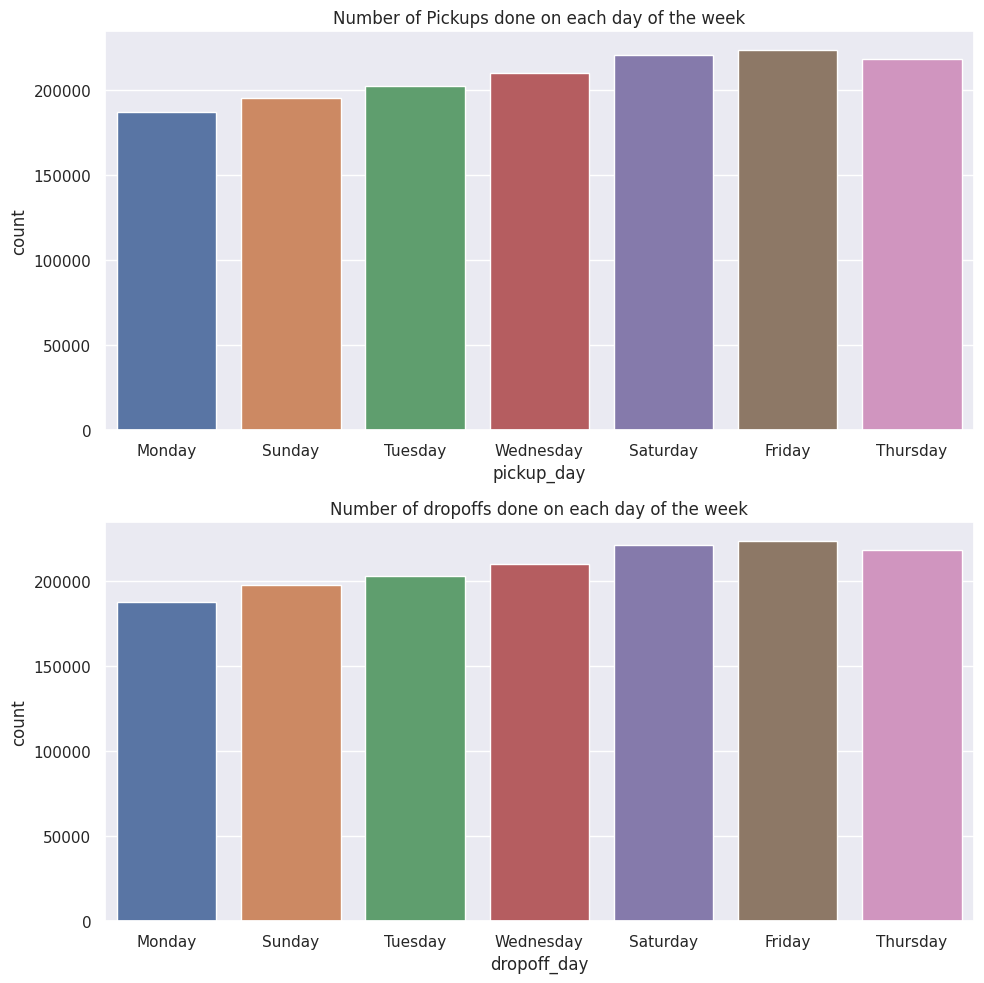

In [ ]:
#Number of Pickups and Dropoff on each day of the week
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=data,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=data,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')

plt.tight_layout()

Thus we see most trips were taken on Friday and Monday being the least. The distribution of trip duration with the days of the week is something to look into as well.

In [ ]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calculate_distance(df):
  pickup=(df['pickup_latitude'],df['pickup_longitude'])
  dropoff=(df['dropoff_latitude'],df['dropoff_longitude'])
  return haversine(pickup,dropoff)

In [ ]:
#Calculate distance and assign new column to the dataframe.
data['distance']=data.apply(lambda x:calculate_distance(x),axis=1)
data.head(3)

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_day dropoff_day  \
0         40.765602                  N            455     Monday      Monday   
1         40.731152                  N            663     Sunday      Sunday   
2         40.710087                  N           2124    Tuesday     Tuesday   

   distance  
0  1.498523  
1  1.805510  
2  6.385107

### Outlier Detection using IQR Method

IQR=Q3-Q1
Lower_Limit_Outlier= Q1-1.5*IQR

Upper_Limit_Outlier= Q3+1.5*IQR

so we have to take the values which is greater then lower limit outlier and less then upper limit outlier
remove the outlier present in distance

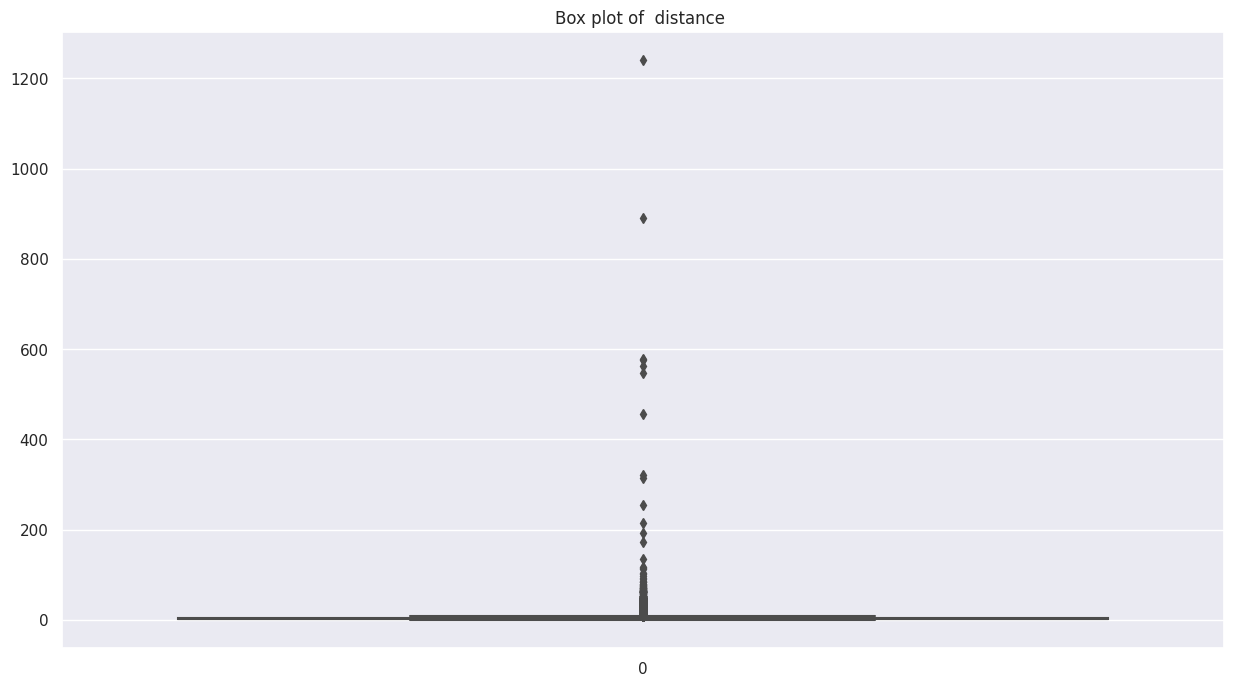

In [ ]:
# box plot to findot how many outliers in distance.
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=data['distance'], orient="v")

In [ ]:
# calculate the percentiles for calculate the outliers.
percentile_1=np.percentile(data['distance'],25)
percentile_2=np.percentile(data['distance'],50)
percentile_3=np.percentile(data['distance'],75)
print(percentile_1)
print(percentile_2)
print(percentile_3)

1.231838267692074
2.0937200248916445
3.8753427710757147


In [ ]:
# outliers
iqr=percentile_3-percentile_1
lower_limit=percentile_1-1.5*iqr
upper_limit=percentile_3+1.5*iqr
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)

upper limit: 7.840599526151175
lower limit: -2.733418487383387


In [ ]:
# select data without any outliers based on distance features
data=data[data['distance']<upper_limit]
data=data[data['distance']>lower_limit]

In [ ]:
data.shape

(1317971, 14)

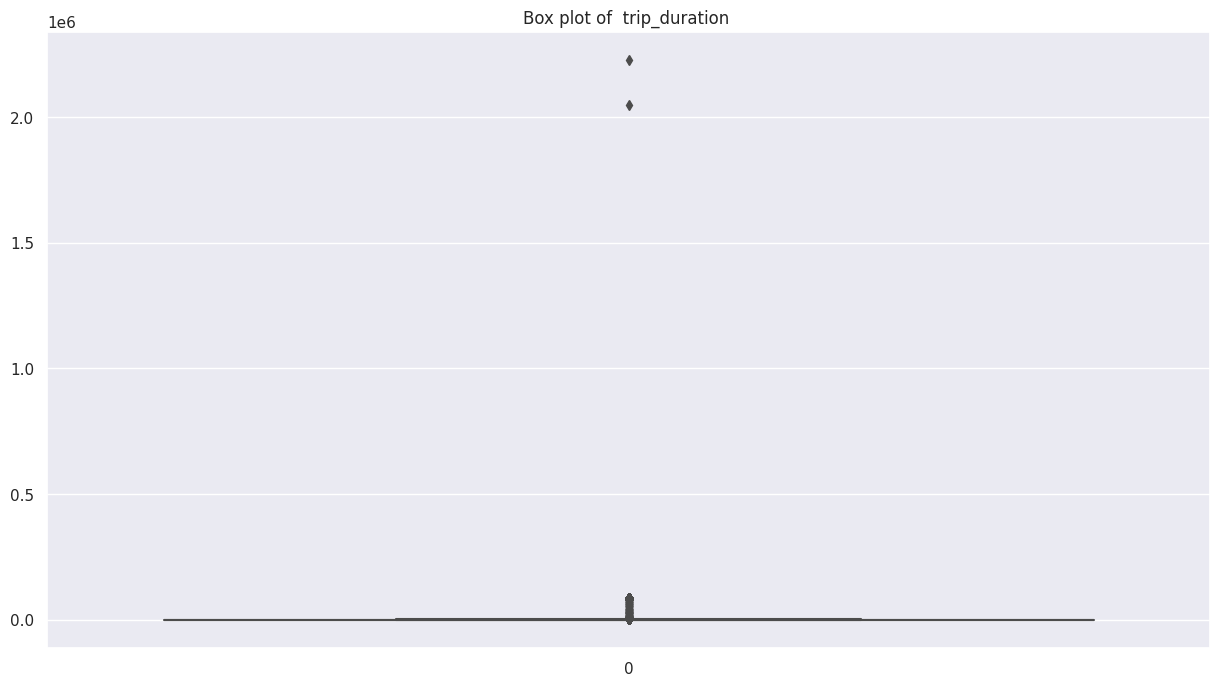

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=data['trip_duration'], orient="v")

In [ ]:
# calculate q1,q3
percentile_q1_trip_duration = np.percentile(data['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(data['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(data['trip_duration'],75)
print(percentile_q3_trip_duration)

373.0
605.0
931.0


In [ ]:
# calculate lower limit outlier and upper limit outlier.
iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

lower limit for outlier  : -464.0
Upper limit for outlier  : 1768.0


In [ ]:
data=data[data['trip_duration']>0]
data=data[data['trip_duration']<upper_limit_outlier_trip_duration]
data.shape

(1277396, 14)

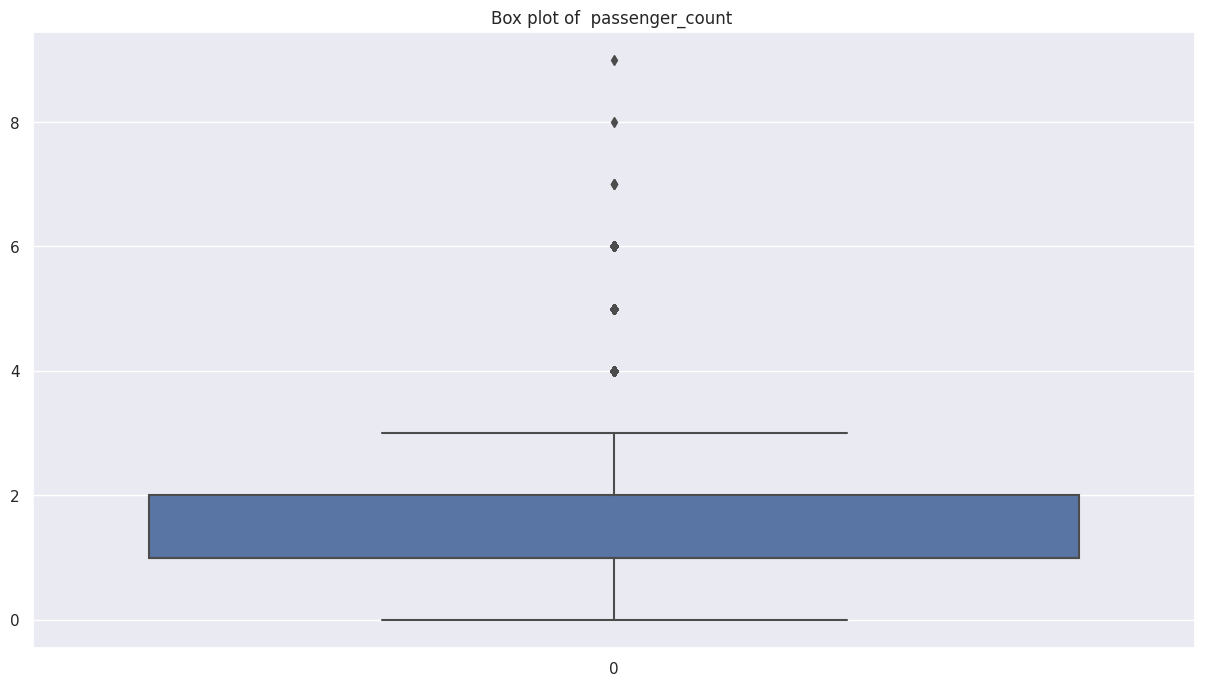

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  passenger_count ")
ax = sns.boxplot(data=data['passenger_count'])

In [ ]:
# calculate percentile
percentile_q1_passenger_count = np.percentile(data['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(data['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(data['passenger_count'],75)
print(percentile_q3_passenger_count)

# findout upper limit and lower limt outlier.

iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)

# select the data

data=data[data['passenger_count']>0]
data=data[data['passenger_count']<upper_limit_outlier_passenger_count]

# shape

data.shape

1.0
1.0
2.0
lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


(1142603, 14)

In [ ]:
#convert pickup_datetime and dropoff_datetime fetures into datetime format 'y%,m%,d%,H%,m%,s%'
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'],format='Y%,m%,d%,H%,M%,S%')
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'],format='Y%,m%,d%,H%,M%,S%')

In [ ]:
data["pickup_datetime"].apply(lambda x: x.month)

0          3
1          6
3          4
4          3
7          5
          ..
1458637    4
1458640    1
1458641    4
1458642    1
1458643    4
Name: pickup_datetime, Length: 1142603, dtype: int64

In [ ]:
#Calculate and assign new columns to the dataframe such as year,
#month ,day_num,hour and minute which will help us to gain more insights from the data.
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['pickup_month']=data.apply(lambda x:x.pickup_datetime.month,axis=1)
data['pickup_year']=data.apply(lambda x:x.pickup_datetime.year,axis=1)
data['pickup_hour']=data.apply(lambda x:x.pickup_datetime.hour,axis=1)
data['pickup_min']=data.apply(lambda x:x.pickup_datetime.minute,axis=1)
data['pickup_daynum']=data.apply(lambda x:x.pickup_datetime.day,axis=1)

Converting trip duration into hours.

Taking log of our distance for normalisation of data.

Taking log of our trip duration as well to normalize it's data too.

In [ ]:
#Converting trip duration into hours.

#Taking log of our distance for normalisation of data.

#Taking log of our trip duration as well to normalize it's data too.

data['trip_duration_hour']=data['trip_duration']/3600
data['log_distance']=np.log(data.distance)
data['log_trip_duration']=np.log(data.trip_duration_hour)

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Bivariate Analysis

Bivariate analysis is used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y.

### Chart 6. Store Fwd Flag

This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

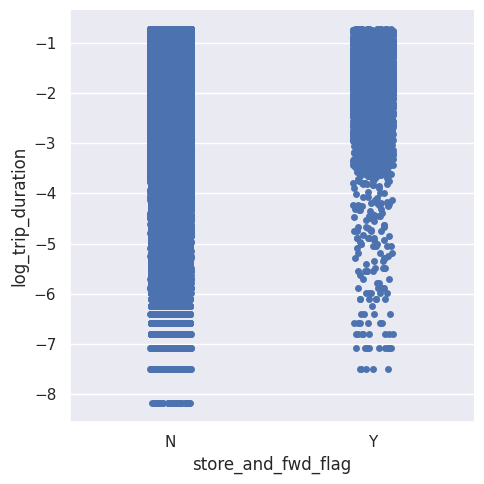

In [ ]:
#Distribution of the Store and Fwd flag
sns.catplot(x="store_and_fwd_flag", y="log_trip_duration",kind="strip",data=data)

#### Conclusion

- Above result shows that only about 1% of the trip details were stored in the vehicle first before sending it to the server. This might have occured because of the following reasons:
 1. Outstation trips didn't had proper connection at the time when trip completes.
 2. Temporary loss of signals while the trip was about to finish
 3. Inconsistent signal reception over the trip duration.
 4. The GPS or mobile device battery was down when the trip finished.

### Chart 7.Scatter Plot

<Axes: xlabel='distance', ylabel='trip_duration'>

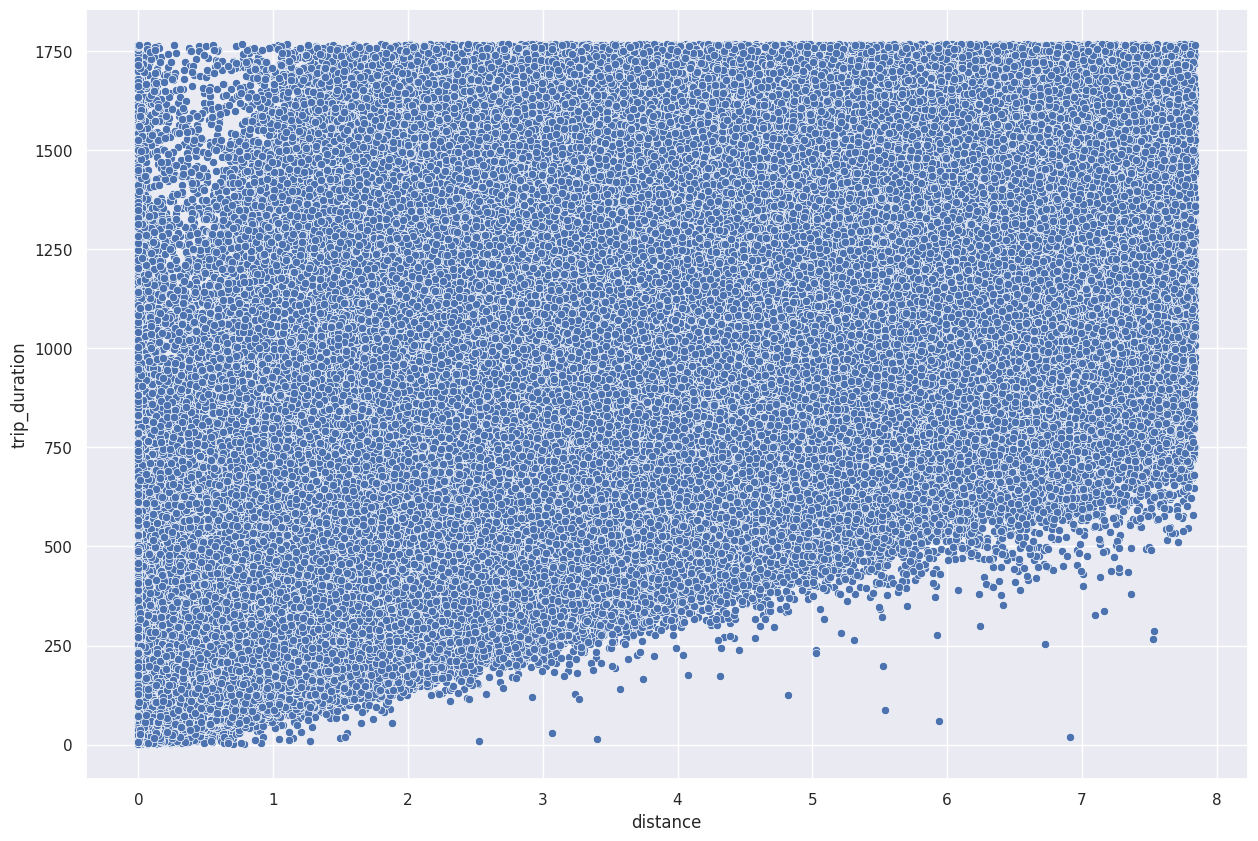

In [ ]:
# scatter plot on distance and trip_duration.
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='distance',y='trip_duration',data=data)

<Axes: xlabel='log_distance', ylabel='log_trip_duration'>

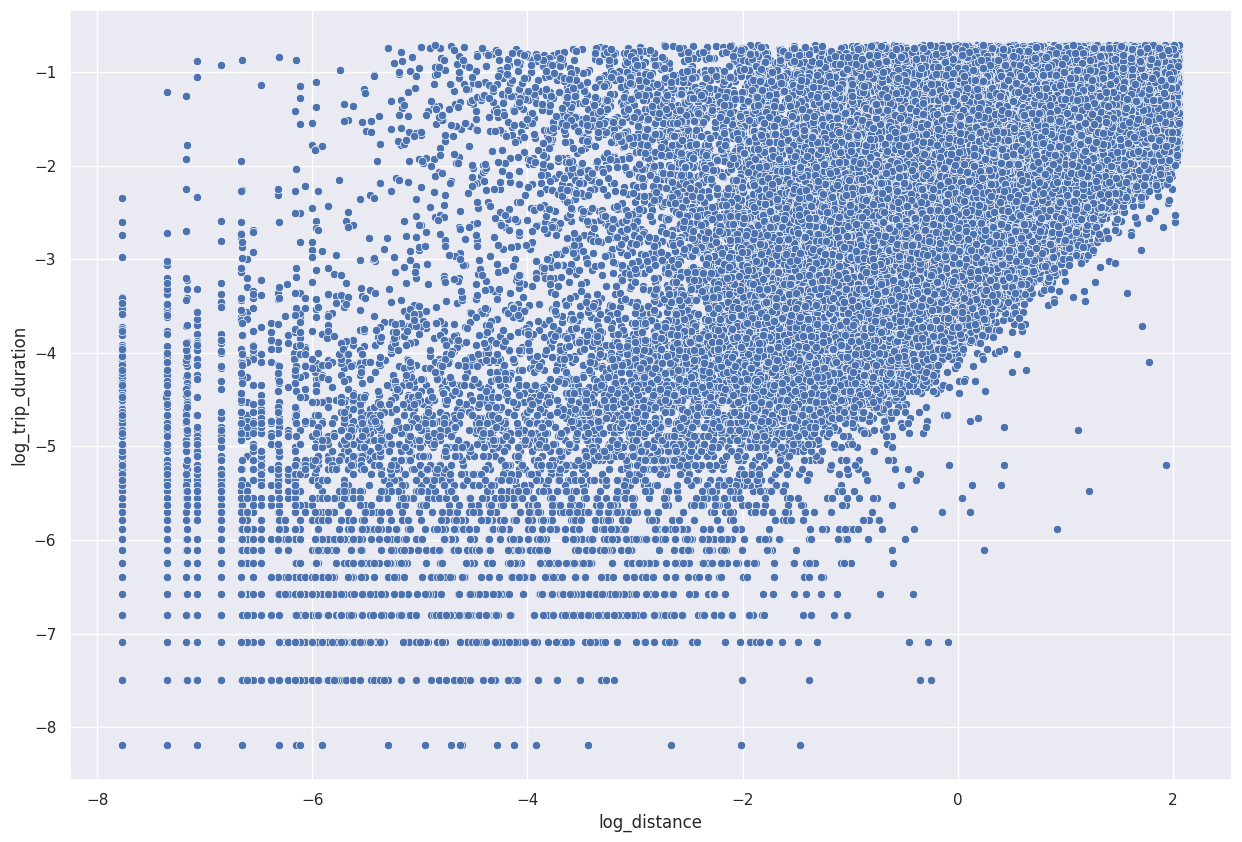

In [ ]:
# scatter plot on log_distance and log trip duration
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='log_distance',y='log_trip_duration',data=data)

### Dummy Variables

In [ ]:
#Dummify all the categorical features like "store_and_fwd_flag, Day" except the label i.e. "trip_duration"
data= pd.get_dummies(data, columns=["store_and_fwd_flag", "pickup_day"], prefix=["store_and_fwd_flag",'pickup_day'])

In [ ]:
#Feature for the Machine learning models
newdata=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','pickup_month','pickup_hour','pickup_min',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','pickup_day_Friday','pickup_day_Monday','pickup_day_Saturday','pickup_day_Sunday','pickup_day_Thursday','pickup_day_Tuesday','pickup_day_Wednesday','trip_duration_hour']

In [ ]:
data=data[newdata]
data.shape

(1142603, 20)

### Chart 8. Correlation Plot

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two or more, numerically measured, continuous variables. This analysis is useful when we need to check if there are possible connections between variables. We will utilize Heatmap for our analysis.

#### Heat Map

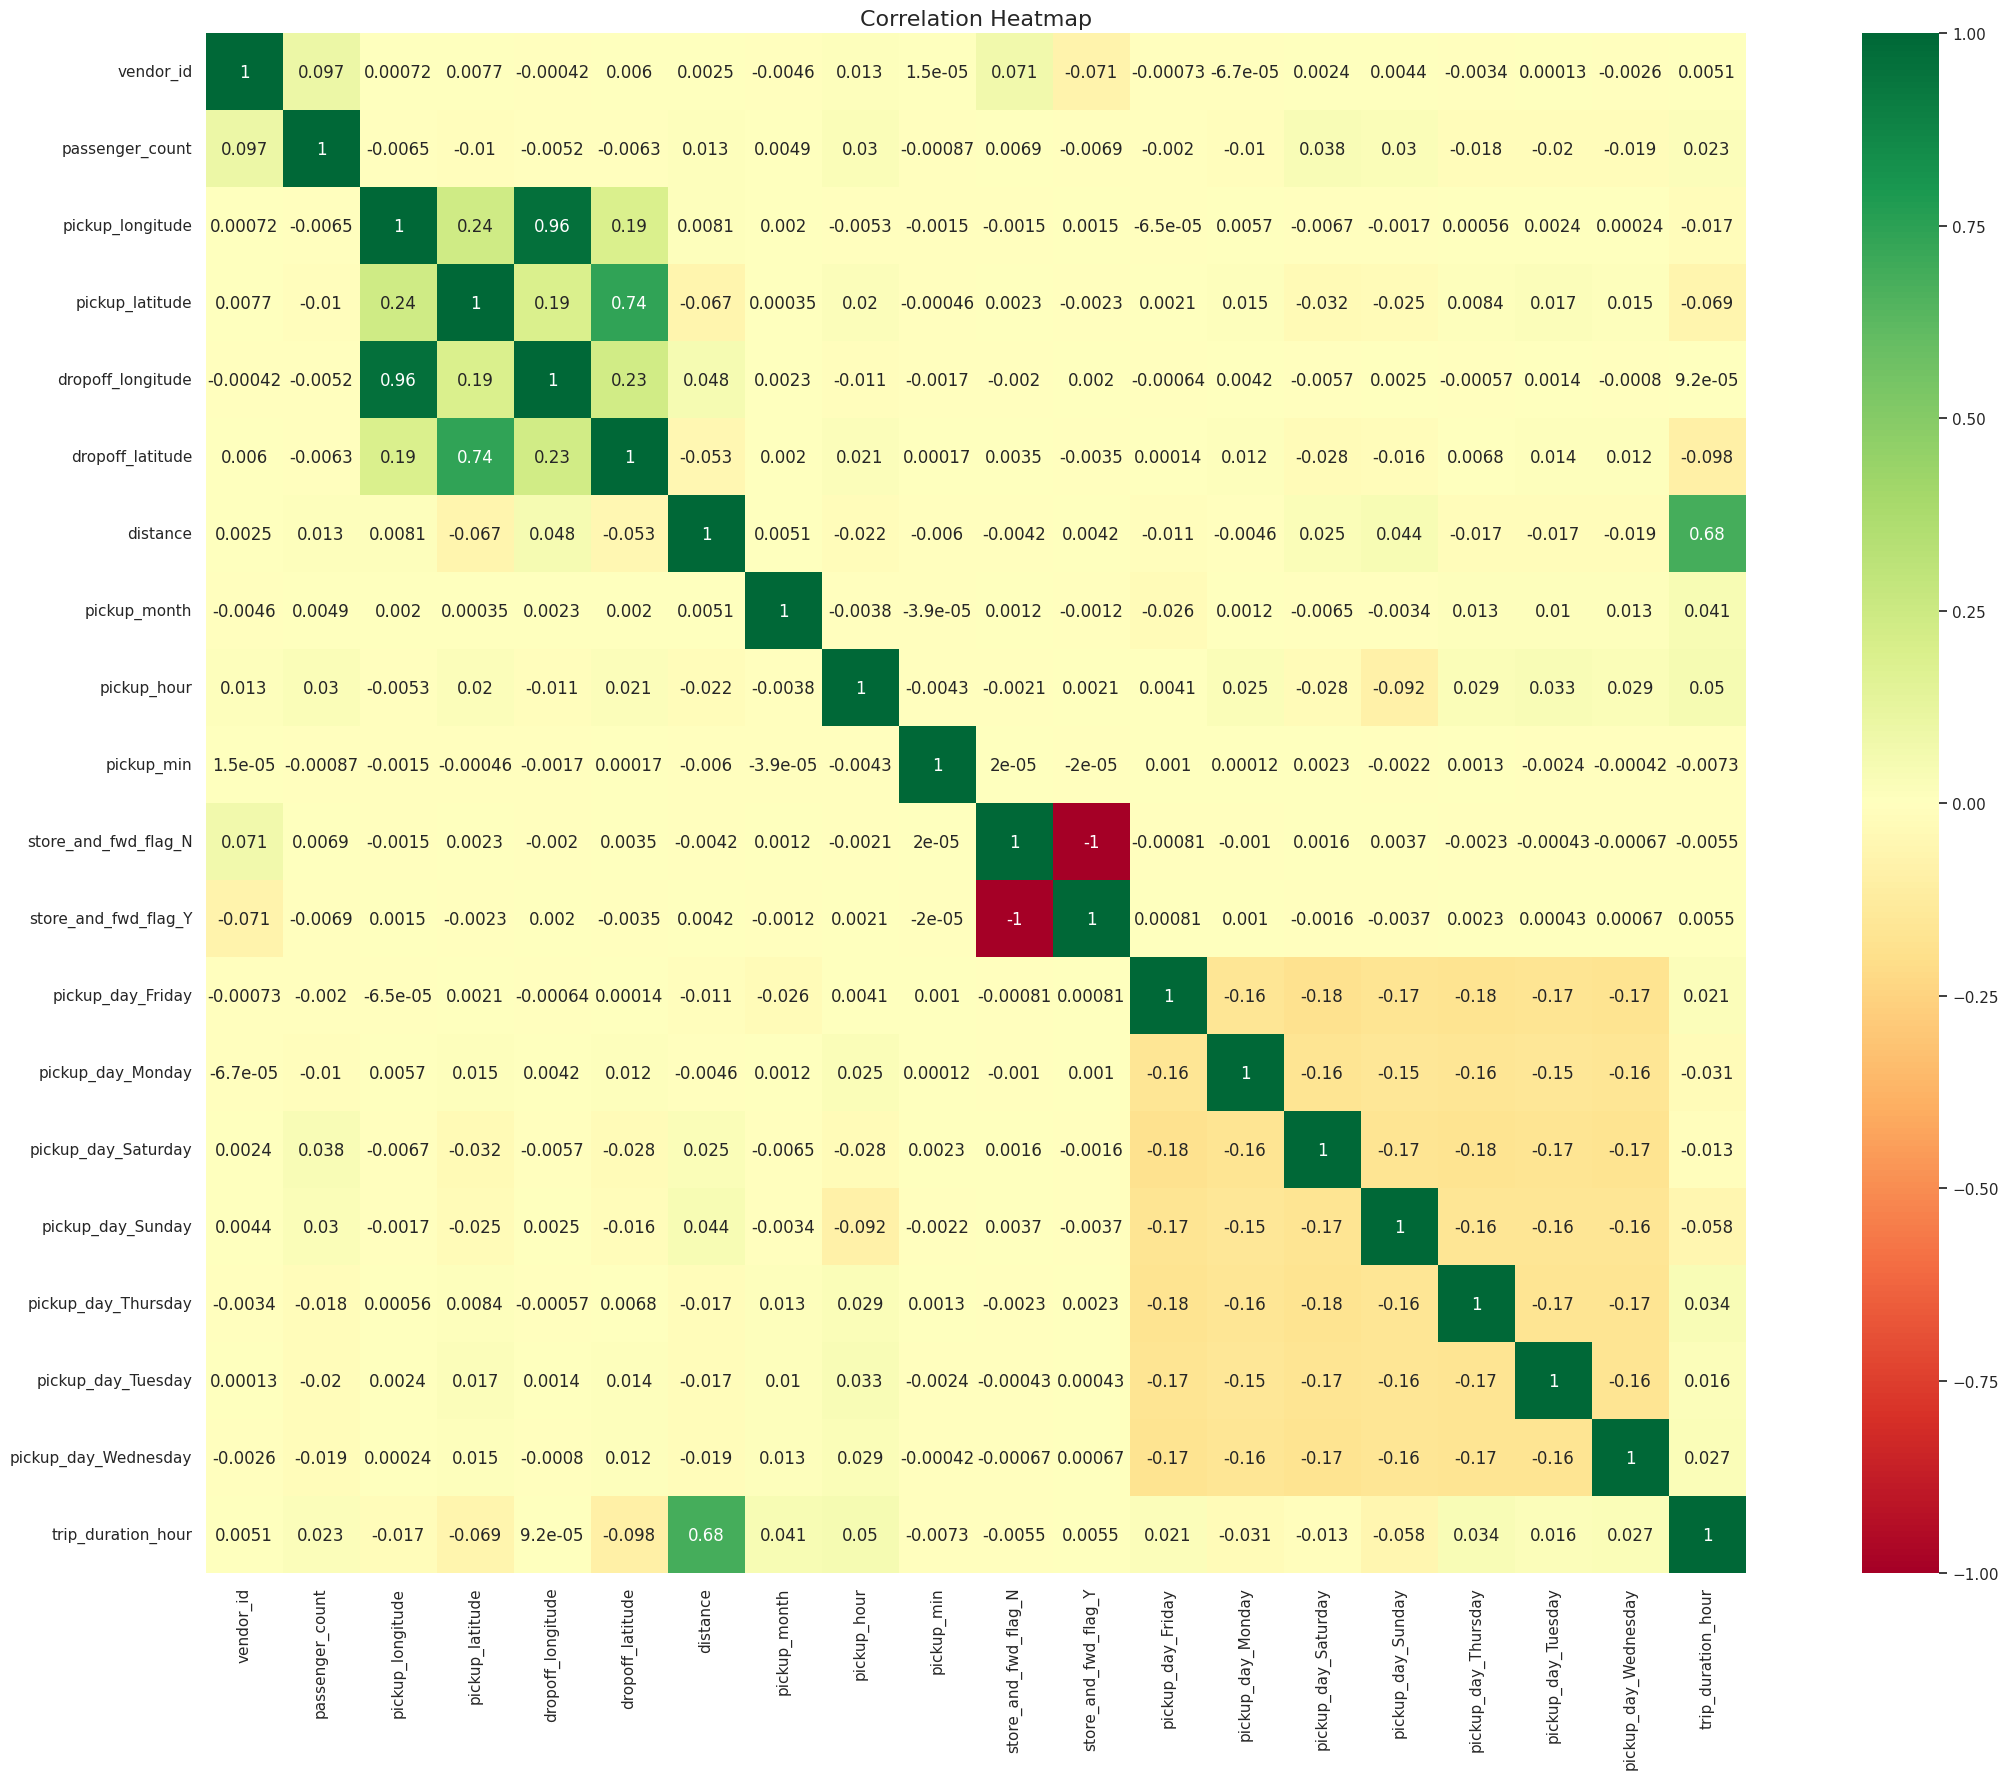

In [ ]:
plt.figure (figsize= (30,20))

sns.heatmap(data.corr(), cmap='RdYlGn', annot=True,vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Feature Scalling.

In [ ]:
data.head(2)

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0          2                1        -73.982155        40.767937   
1          1                1        -73.980415        40.738564   

   dropoff_longitude  dropoff_latitude  distance  pickup_month  pickup_hour  \
0         -73.964630         40.765602  1.498523             3           17   
1         -73.999481         40.731152  1.805510             6            0   

   pickup_min  store_and_fwd_flag_N  store_and_fwd_flag_Y  pickup_day_Friday  \
0          24                     1                     0                  0   
1          43                     1                     0                  0   

   pickup_day_Monday  pickup_day_Saturday  pickup_day_Sunday  \
0                  1                    0                  0   
1                  0                    0                  1   

   pickup_day_Thursday  pickup_day_Tuesday  pickup_day_Wednesday  \
0                    0                   0                     0   
1                    0                   0                     0   

   trip_duration_hour  
0            0.126389  
1            0.184167

In [ ]:
#For Standarization  apply z-score
from scipy.stats import zscore
#Train test split
X = data[newdata[0:-1]].apply(zscore)[:100000]
y=data['trip_duration_hour'][:100000]

# Split The Data

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(80000, 19) (80000,)
(20000, 19) (20000,)


# Create Func for Evaluation Metrices

In [ ]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt,yt,yp,disp="on"):
  ''' Take the different set of parameter and prints evaluation metrics '''
  MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
  RMSE=(np.sqrt(MSE))
  R2=(r2_score(y_true=yt,y_pred=yp))
  Adjusted_R2=(1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
  if disp=="on":
    print("MSE :",MSE,"RMSE :", RMSE)
    print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((yp)[:100]) 
  plt.plot((np.array(yt)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')


  
  return (MSE,RMSE,R2,Adjusted_R2) 


# Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [ ]:
# Instance the linear regression object
reg = LinearRegression().fit(X_train, y_train)

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.4976598030242275 Adjusted R2 : 0.4975404673935382


(0.0055, 0.07416198487095663, 0.4976598030242275, 0.4975404673935382)

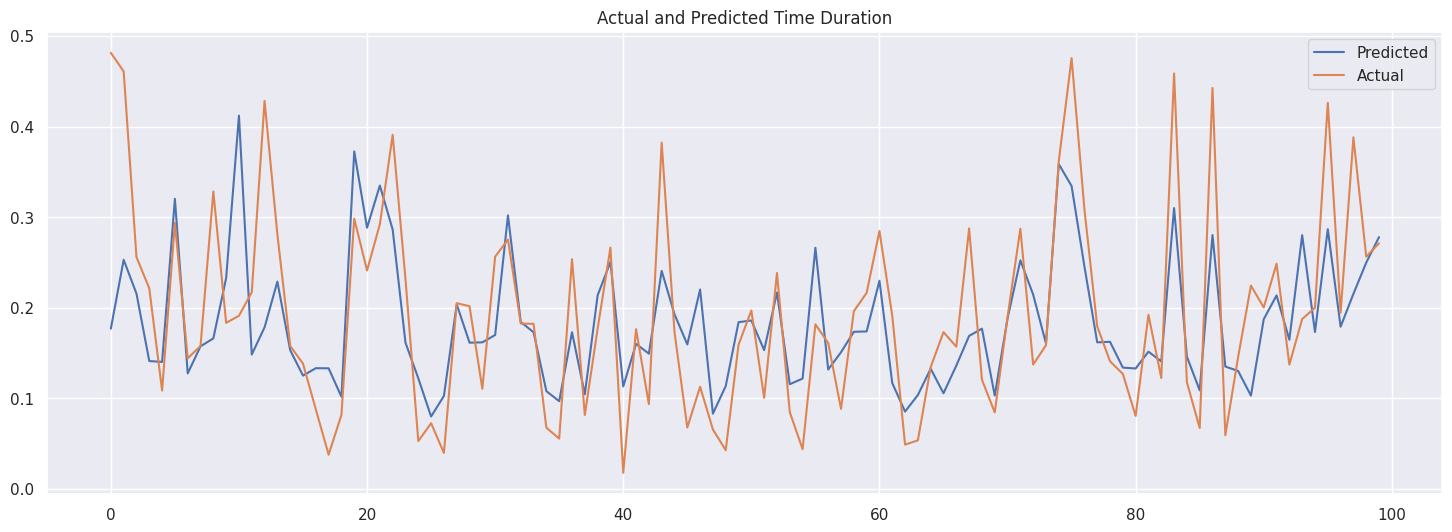

In [ ]:
reg.score(X_train, y_train)

y_pred_train = reg.predict(X_train)

y_pred_test = reg.predict(X_test)

#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_train)

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.4960611779723191 Adjusted R2 : 0.49558195687029083


(0.0055, 0.07416198487095663, 0.4960611779723191, 0.49558195687029083)

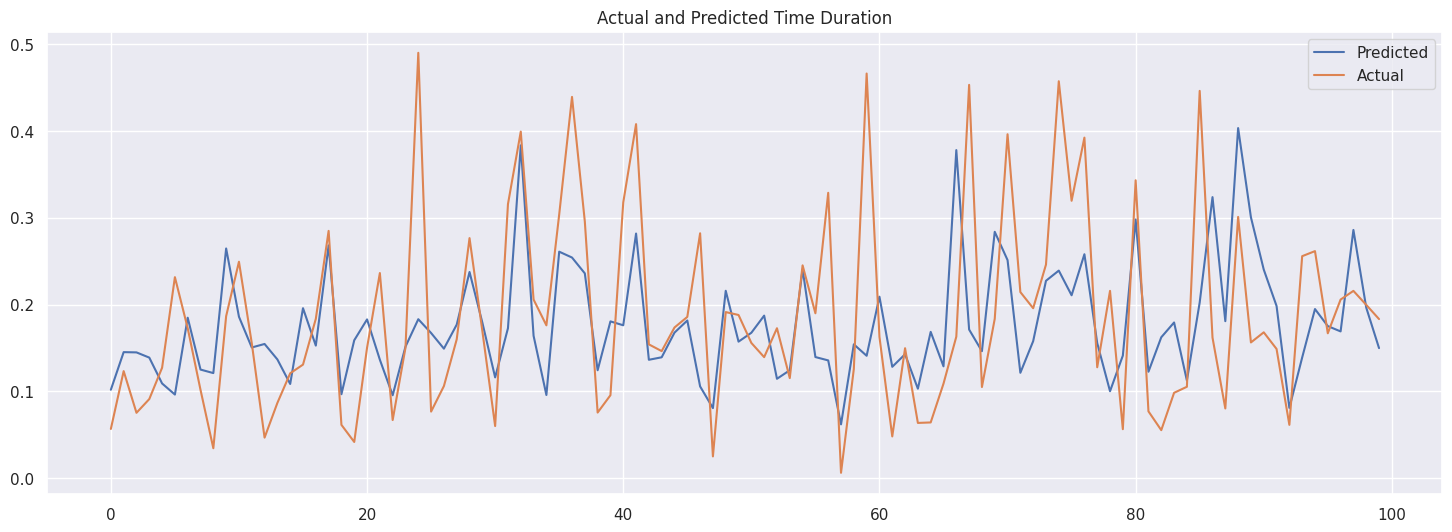

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_test)

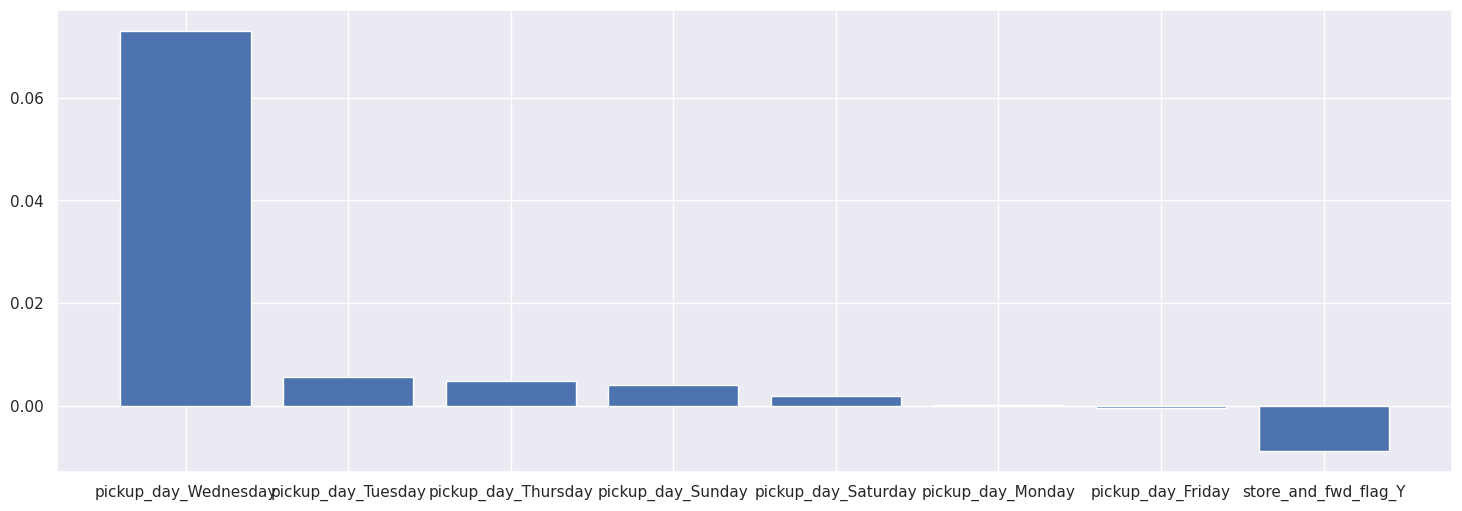

In [ ]:
#Feature Importances for Linear Regression

plt.figure(figsize=(18,6))

importance=reg.coef_
importance=np.sort(importance)
feature=newdata
indices=np.argsort(importance)
indices=indices[:10:-1]
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)),[feature[i] for i in indices])
plt.show()

# Decision Tree

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,16,20]

# HYperparameter Grid
param_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
dt_model = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt_model,
                       param_grid = param_dt,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   0.3s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

MSE : 0.0039 RMSE : 0.06244997998398398
R2 : 0.6437001193563989 Adjusted R2 : 0.6436154769741506


(0.0039, 0.06244997998398398, 0.6437001193563989, 0.6436154769741506)

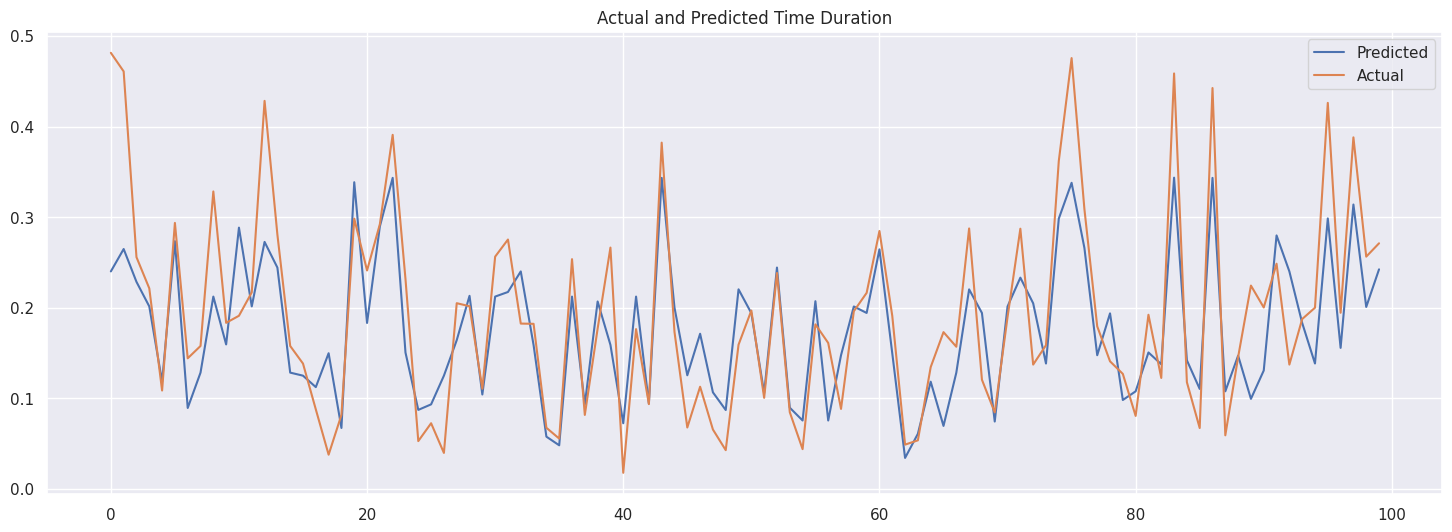

In [ ]:
# decision tree grid cv best score.
dt_grid.best_score_

# decision tree grid cv best score.

dt_grid.best_score_

# decision tree grid cv best estimator.

dt_grid.best_estimator_


dt_optimal_model =dt_grid.best_estimator_

# best prediction value of train and test
y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_dt_train)

MSE : 0.0042 RMSE : 0.0648074069840786
R2 : 0.609772634819681 Adjusted R2 : 0.6094015477356758


(0.0042, 0.0648074069840786, 0.609772634819681, 0.6094015477356758)

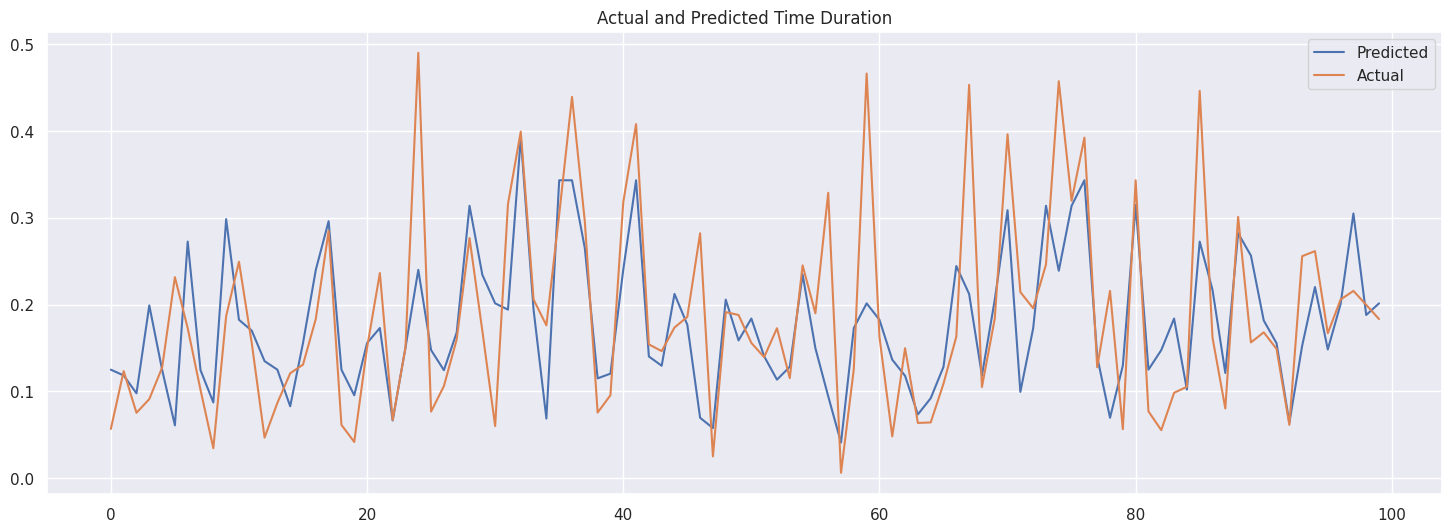

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_dt_test)

## Decision Tree Feature Importance

In [ ]:
importances = dt_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)


# create data frame of feature importance.
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df



Feature  Feature Importance
6               distance            0.795299
8            pickup_hour            0.091215
5       dropoff_latitude            0.052429
15     pickup_day_Sunday            0.016020
14   pickup_day_Saturday            0.012717
4      dropoff_longitude            0.011073
2       pickup_longitude            0.009144
3        pickup_latitude            0.004440
13     pickup_day_Monday            0.001857
9             pickup_min            0.001381
12     pickup_day_Friday            0.001155
7           pickup_month            0.001138
0              vendor_id            0.000939
16   pickup_day_Thursday            0.000732
18  pickup_day_Wednesday            0.000285
17    pickup_day_Tuesday            0.000133
1        passenger_count            0.000044
11  store_and_fwd_flag_Y            0.000000
10  store_and_fwd_flag_N            0.000000

<Axes: title={'center': 'Features importace'}, xlabel='Feature', ylabel='Feature Importance'>

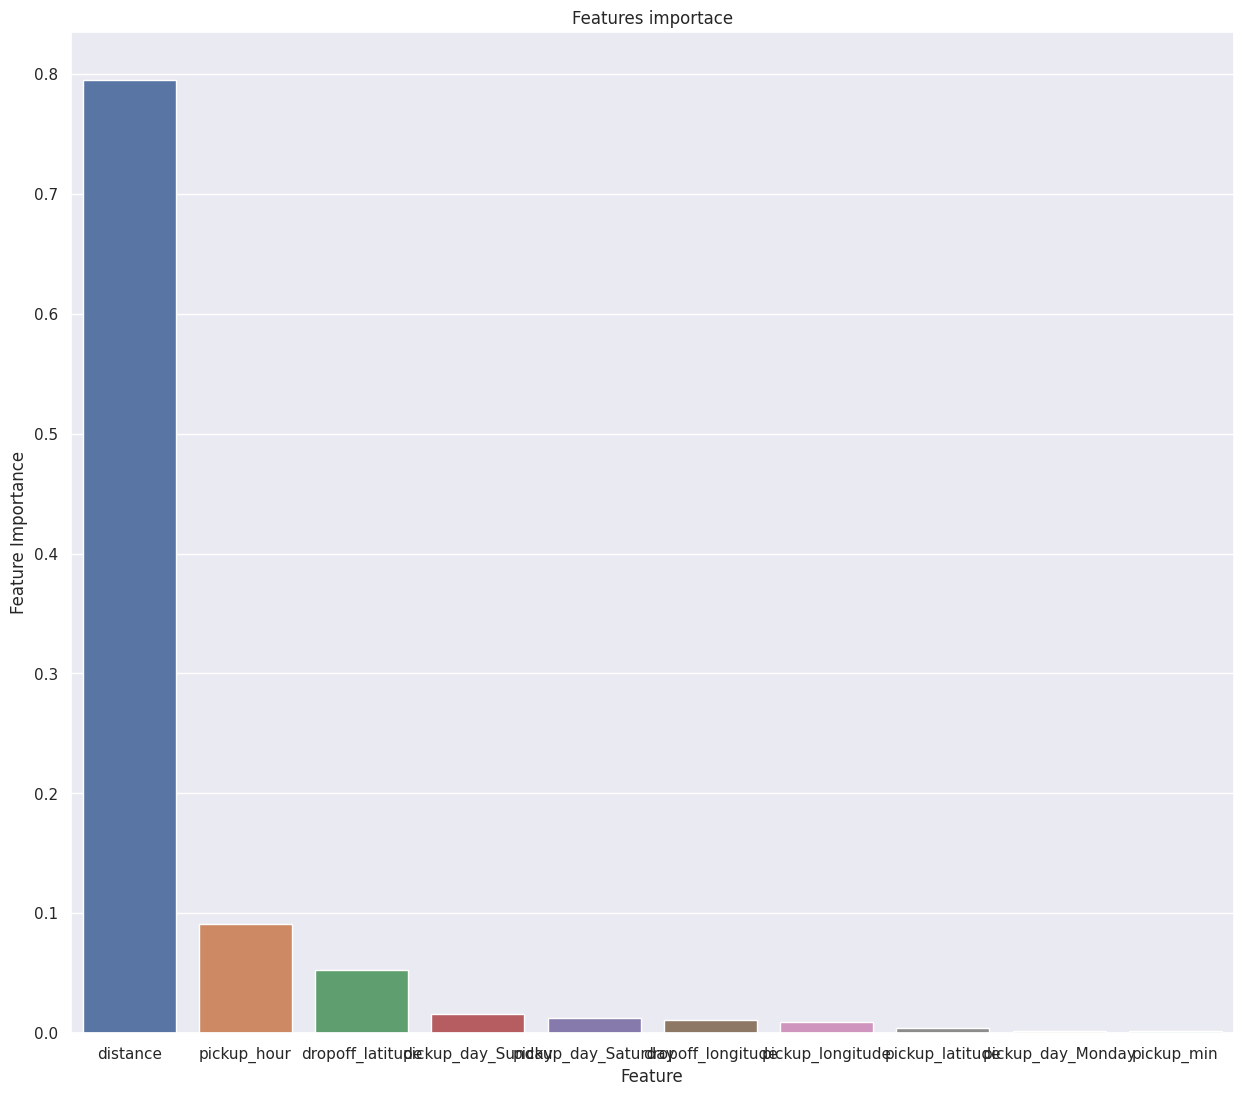

In [ ]:
# Barplot of Feature importanec

plt.figure(figsize=(15,13))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

# Regularization

Regularization is a technique used to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting. 

## Lasso Regression

Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.


In [ ]:
from sklearn.model_selection import GridSearchCV
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.877e+00, tolerance: 7.095e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.791e+00, tolerance: 7.058e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.917e+00, tolerance: 7.076e-02

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  0.49743409791094206


In [ ]:
# predict values
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.49777384114450995 Adjusted R2 : 0.49765453260464687


(0.0055, 0.07416198487095663, 0.49777384114450995, 0.49765453260464687)

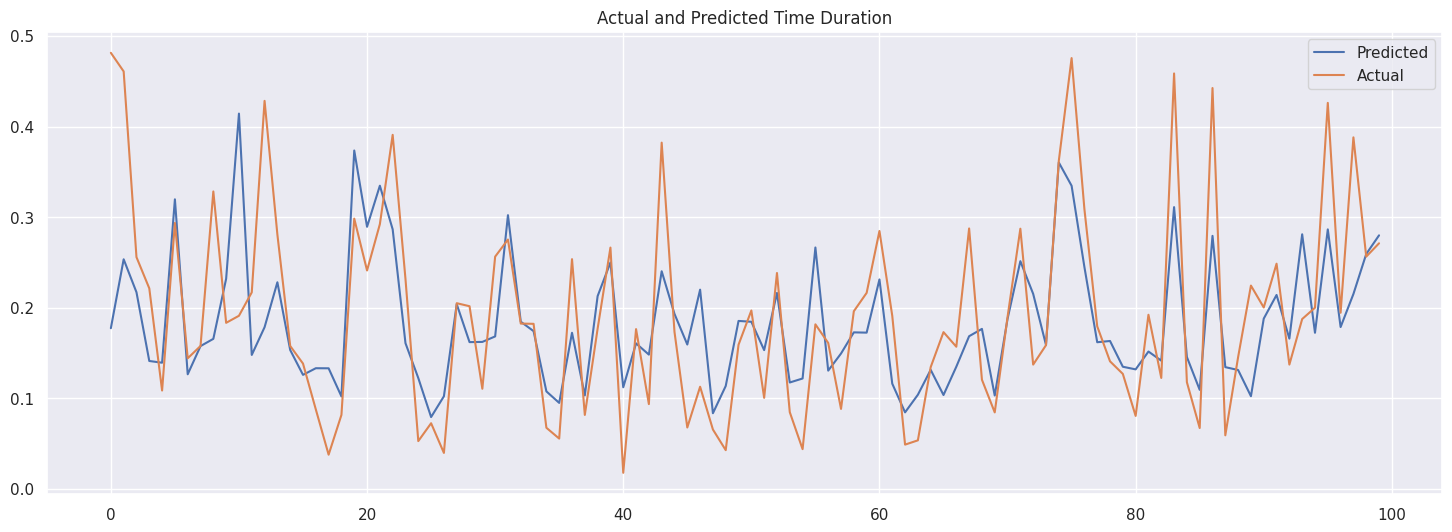

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_lasso_train)

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.49596398487182103 Adjusted R2 : 0.4954846713439214


(0.0055, 0.07416198487095663, 0.49596398487182103, 0.4954846713439214)

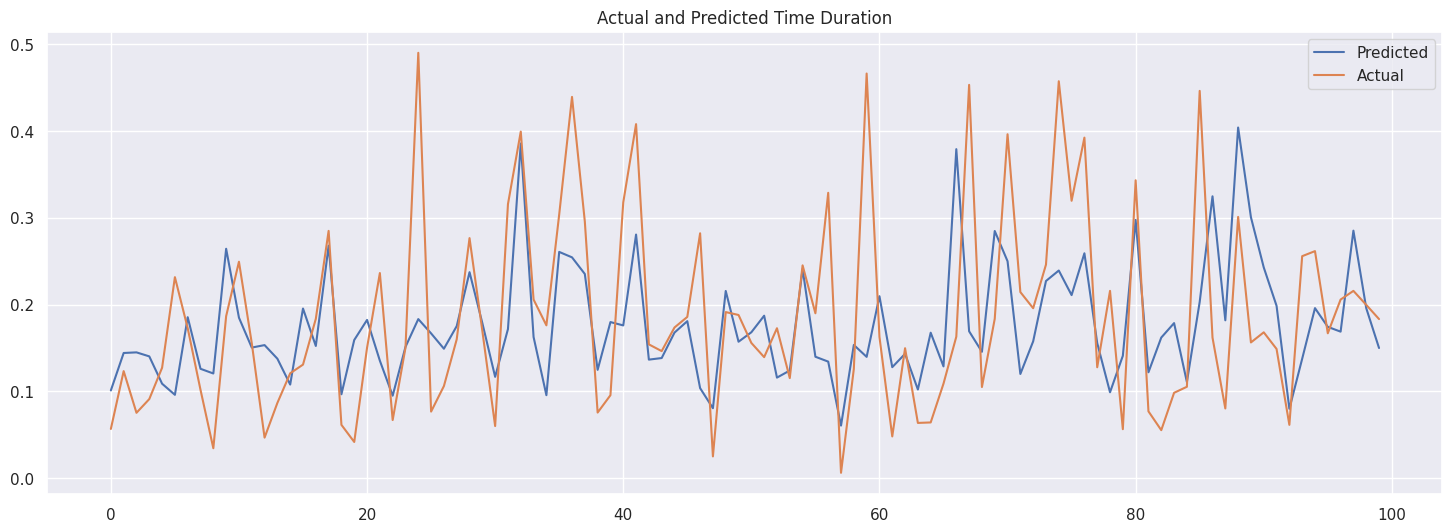

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_lasso)

## Ridge Regression

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. Here the highlighted part represents L2 regularization element.

In [ ]:
from sklearn.linear_model import Ridge
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.03391e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.03391e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 60}

Using  {'alpha': 60}  the negative mean squared error is:  0.49743409791094206


In [ ]:
y_pred_ridge_test = ridge_regressor.predict(X_test)
y_pred_ridge_train=ridge_regressor.predict(X_train)

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.4977736866009538 Adjusted R2 : 0.4976543780243774


(0.0055, 0.07416198487095663, 0.4977736866009538, 0.4976543780243774)

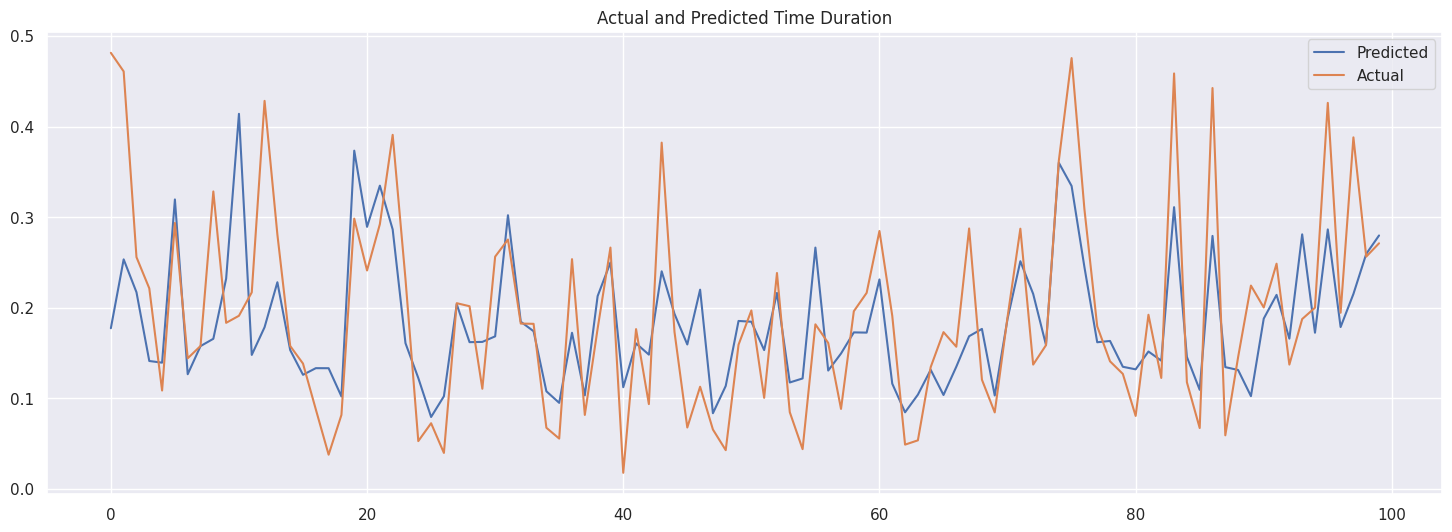

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_ridge_train)

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.49596611097391374 Adjusted R2 : 0.4954867994678329


(0.0055, 0.07416198487095663, 0.49596611097391374, 0.4954867994678329)

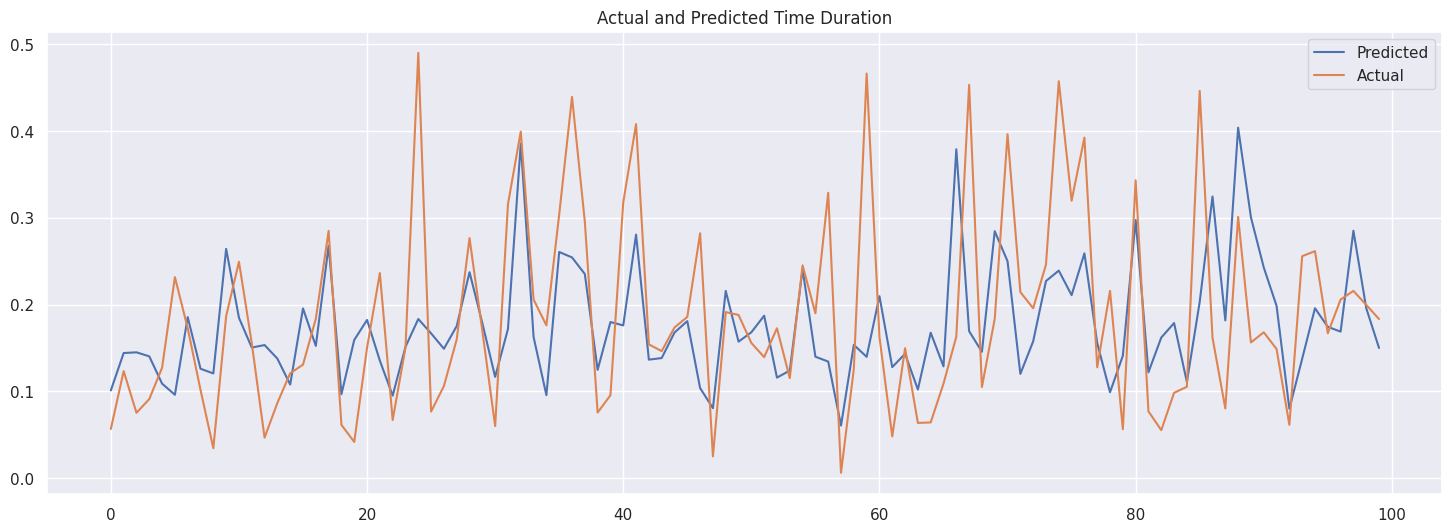

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_ridge_test)

# Random Forest Regression

In [ ]:
# create new object of Random Forest Regression

rfr=RandomForestRegressor()

#fit the model

rfr.fit(X_train,y_train)

RandomForestRegressor()

MSE : 0.0005 RMSE : 0.022360679774997897
R2 : 0.9549318270377454 Adjusted R2 : 0.954921120670075


(0.0005, 0.022360679774997897, 0.9549318270377454, 0.954921120670075)

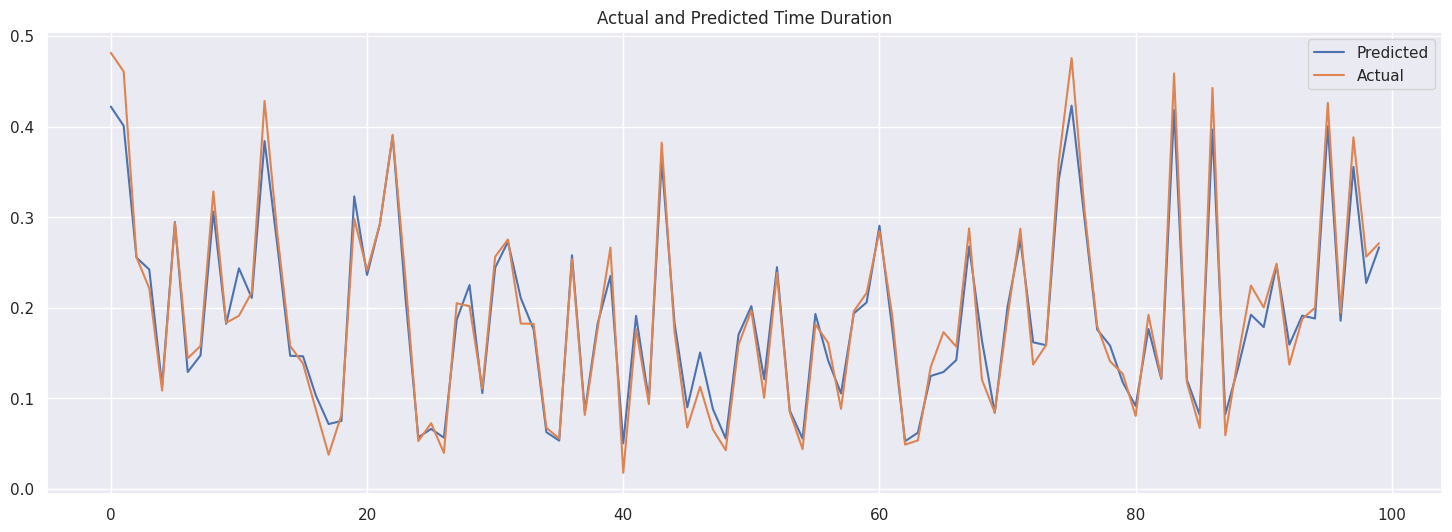

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,rfr.predict(X_train))

MSE : 0.0035 RMSE : 0.05916079783099616
R2 : 0.6786769069220948 Adjusted R2 : 0.6783713444211699


(0.0035, 0.05916079783099616, 0.6786769069220948, 0.6783713444211699)

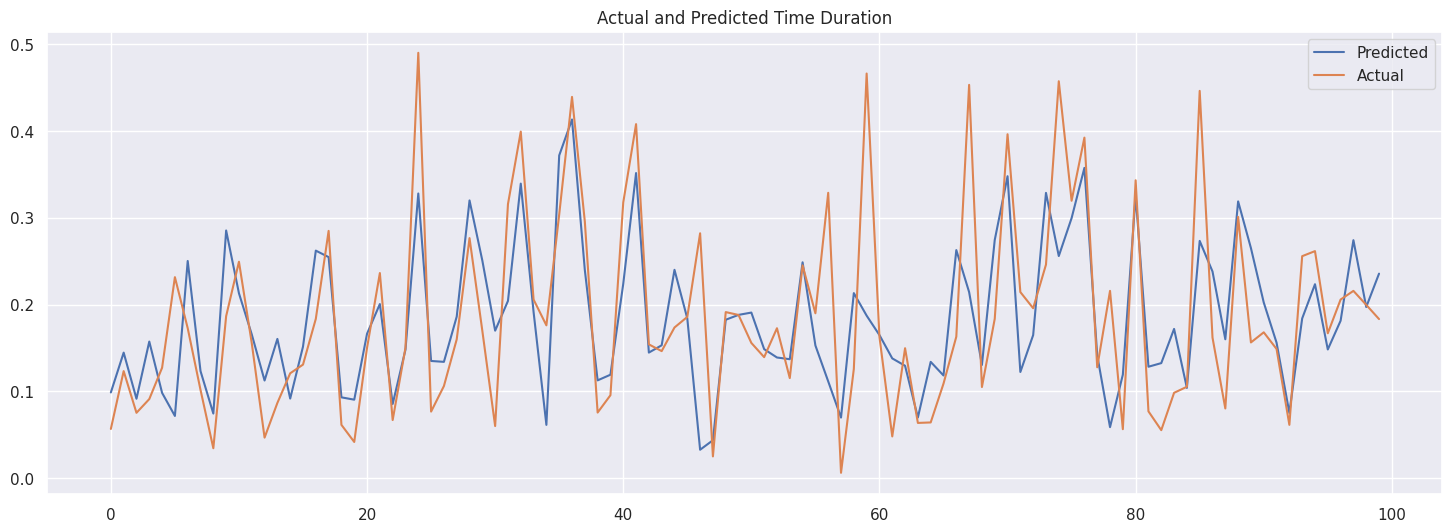

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,rfr.predict(X_test))

# XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way

In [ ]:
# Create an instance of the  XGBRegressor
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

#call xgb object

xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

MSE : 0.0026 RMSE : 0.05099019513592785
R2 : 0.7635813332508326 Adjusted R2 : 0.7635251697766111


(0.0026, 0.05099019513592785, 0.7635813332508326, 0.7635251697766111)

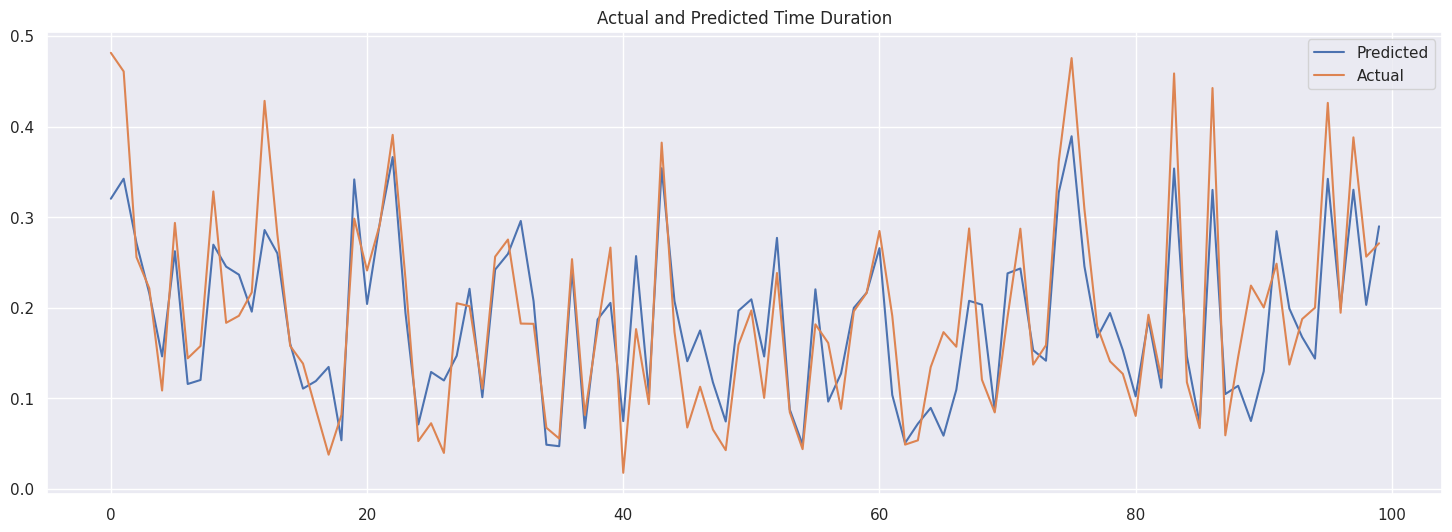

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,xgb_model.predict(X_train))

MSE : 0.0032 RMSE : 0.0565685424949238
R2 : 0.7008968415181362 Adjusted R2 : 0.7006124090851455


(0.0032, 0.0565685424949238, 0.7008968415181362, 0.7006124090851455)

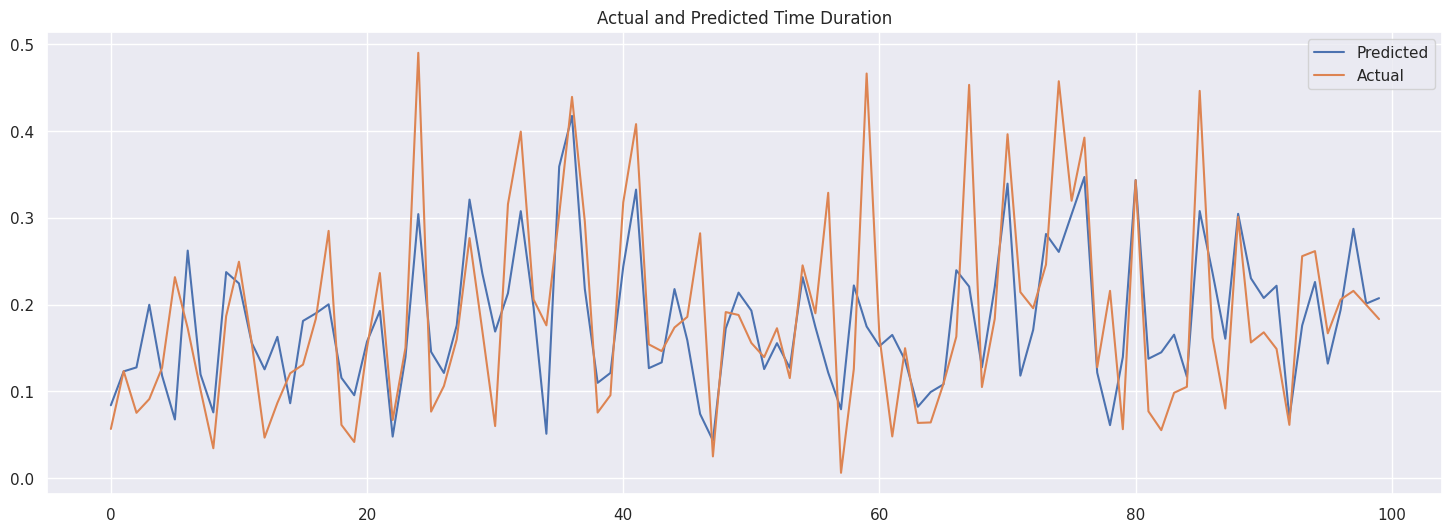

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,xgb_model.predict(X_test))

# GradientBoosting

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees

In [ ]:
#create object of GradientBoostingRegressor()
grb=GradientBoostingRegressor()

# fit the model.

grb.fit(X_train,y_train)

GradientBoostingRegressor()

MSE : 0.0041 RMSE : 0.06403124237432849
R2 : 0.6325690766720107 Adjusted R2 : 0.6324817900060538


(0.0041, 0.06403124237432849, 0.6325690766720107, 0.6324817900060538)

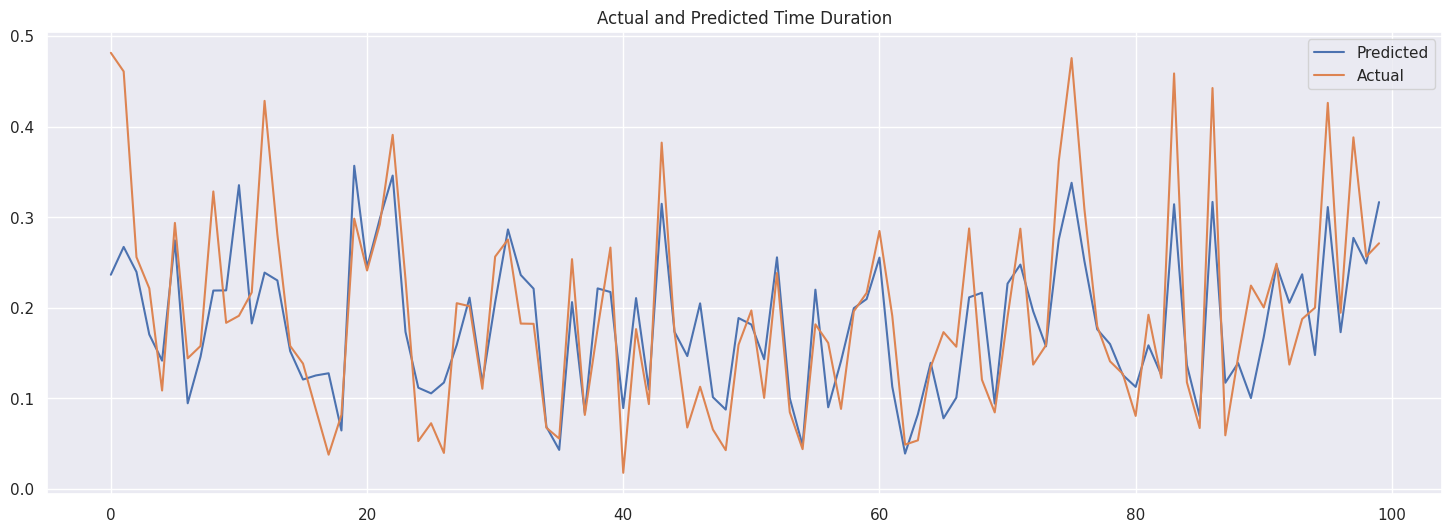

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,grb.predict(X_train))

MSE : 0.004 RMSE : 0.06324555320336758
R2 : 0.6283807585125172 Adjusted R2 : 0.628027366841433


(0.004, 0.06324555320336758, 0.6283807585125172, 0.628027366841433)

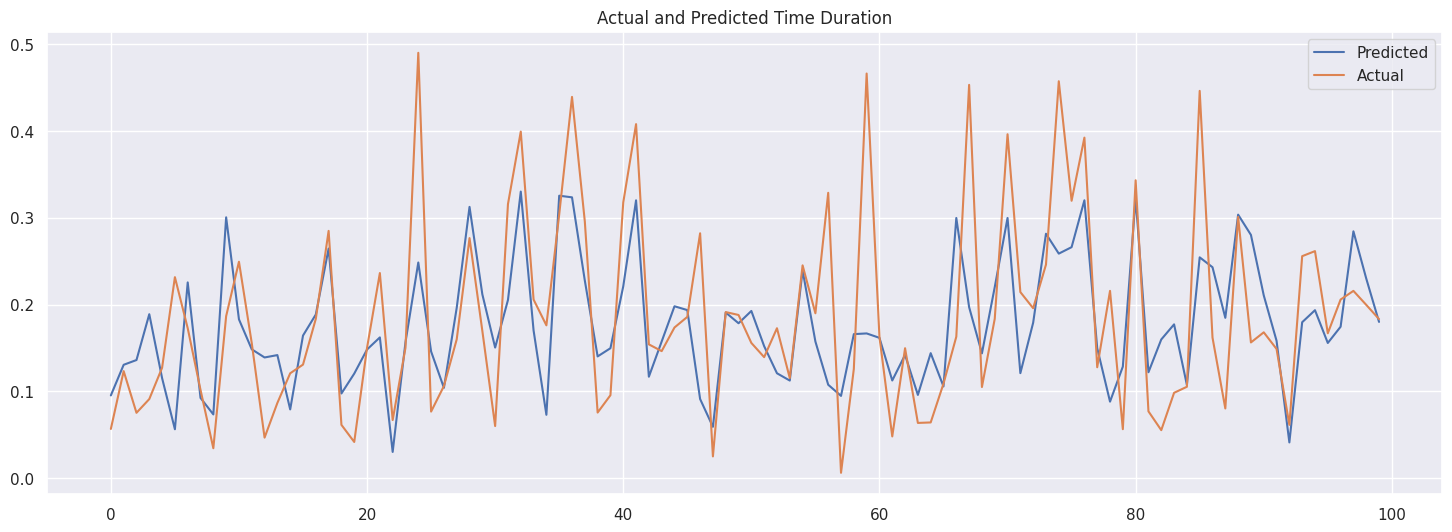

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,grb.predict(X_test))

# AdaBoost Regression

In [ ]:
# create object 
adbr_model=AdaBoostRegressor()

# fit the model
adbr_model.fit(X_train,y_train)

AdaBoostRegressor()

MSE : 0.006 RMSE : 0.07745966692414834
R2 : 0.4525425528089302 Adjusted R2 : 0.45241249915180803


(0.006, 0.07745966692414834, 0.4525425528089302, 0.45241249915180803)

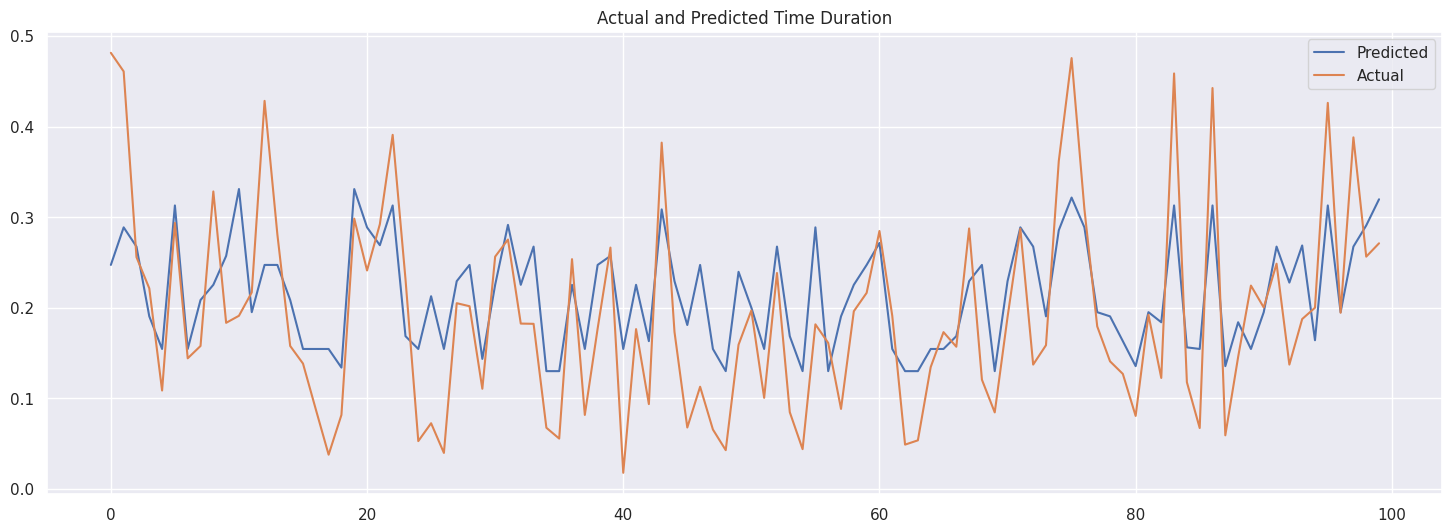

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,adbr_model.predict(X_train))

MSE : 0.006 RMSE : 0.07745966692414834
R2 : 0.44612015039028374 Adjusted R2 : 0.4455934378205848


(0.006, 0.07745966692414834, 0.44612015039028374, 0.4455934378205848)

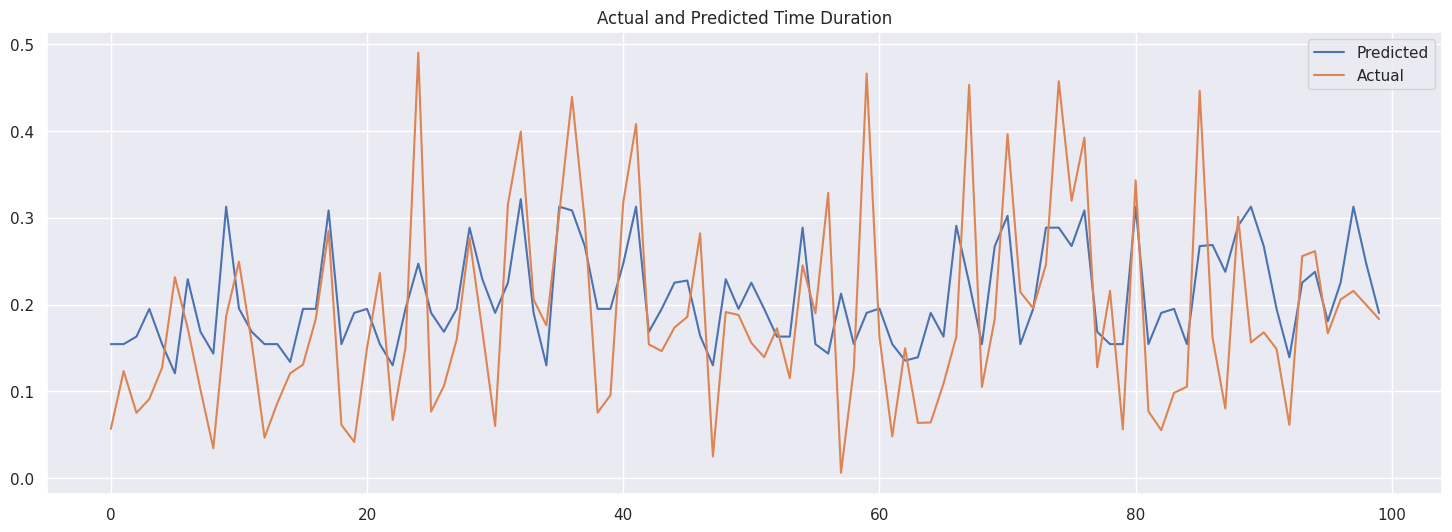

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,adbr_model.predict(X_test))

# Hyper Paramter Tunning Of XGBoost Model.

Hyper Paramter Tunning Of XGBoost Model

In [ ]:
# Number of trees
n_estimators = [50,100,120]

# Maximum depth of trees
max_depth = [5,7,9]
min_samples_split = [40,50]
#learning_rate=[0.1,0.3,0.5]

# HYperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_split':min_samples_split
              }

In [ ]:
# Grid search cv
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 3, verbose=2,scoring="r2")

xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[06:39:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   3.5s
[06:39:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   3.5s
[06:39:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   6.3s
[06:39:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time=   6.7s
[06:39:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time=   9.5s
[06:39:57] WARNING: ../src/learner.cc:767: 
Parameters: { "

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'n_estimators': [50, 100, 120]},
             scoring='r2', verbose=2)

MSE : 0.0021 RMSE : 0.0458257569495584
R2 : 0.8080231130954494 Adjusted R2 : 0.8079775071833315


(0.0021, 0.0458257569495584, 0.8080231130954494, 0.8079775071833315)

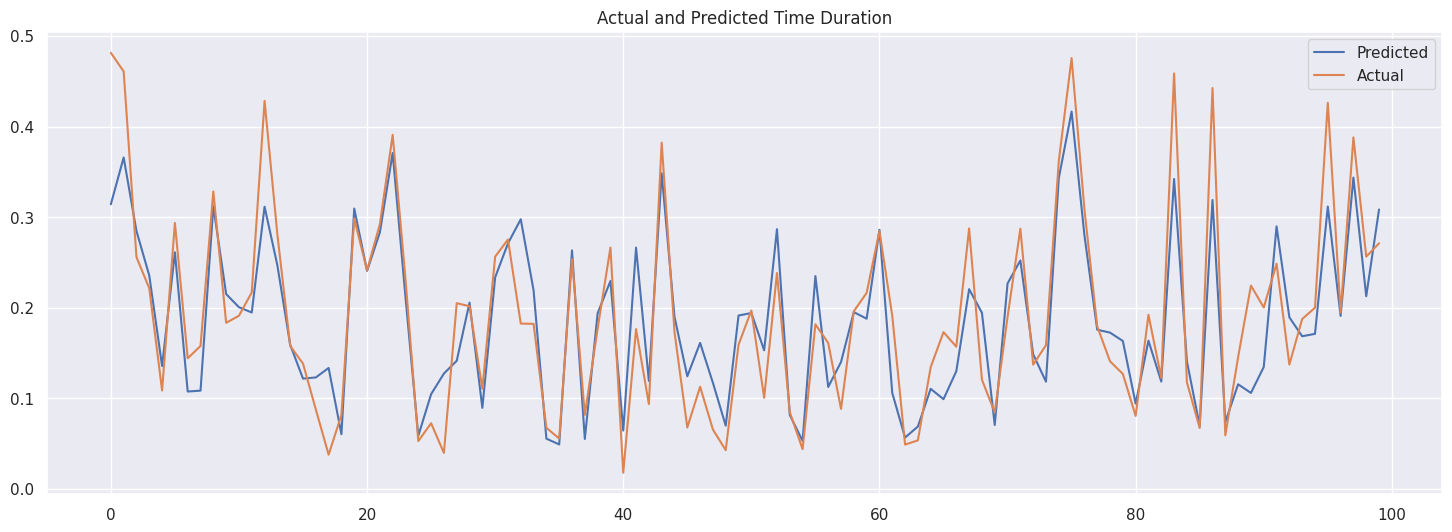

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,xgb_grid.predict(X_train))

MSE : 0.0032 RMSE : 0.0565685424949238
R2 : 0.7076834796092415 Adjusted R2 : 0.7074055009361973


(0.0032, 0.0565685424949238, 0.7076834796092415, 0.7074055009361973)

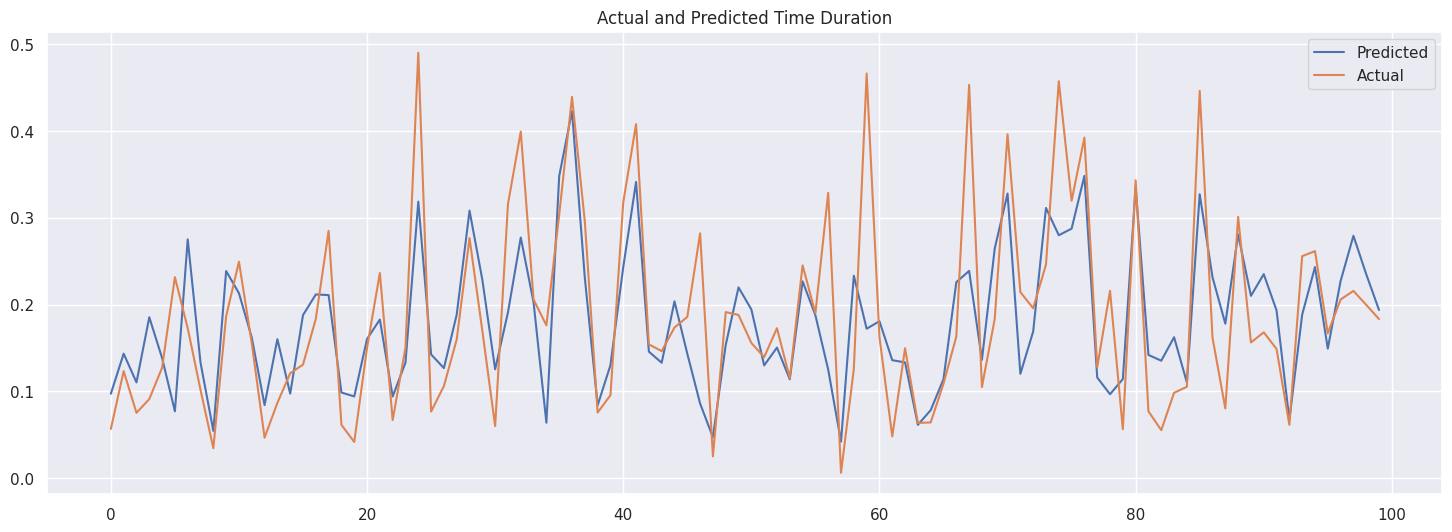

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,xgb_grid.predict(X_test))

In [ ]:
# best score
xgb_grid.best_score_

# best parameter
xgb_grid.best_params_

# best estimator
xgb_optimal_model =xgb_grid.best_estimator_



## Feature importance

In [ ]:
# calculate feature importance
importances = xgb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
# Data Frame

importance_df = pd.DataFrame(importance_dict)

importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
6               distance            0.429874
15     pickup_day_Sunday            0.130289
8            pickup_hour            0.084351
14   pickup_day_Saturday            0.077628
13     pickup_day_Monday            0.055691
5       dropoff_latitude            0.040598
4      dropoff_longitude            0.023752
17    pickup_day_Tuesday            0.021377
2       pickup_longitude            0.019810
3        pickup_latitude            0.019621
12     pickup_day_Friday            0.018838
7           pickup_month            0.016314
16   pickup_day_Thursday            0.015814
18  pickup_day_Wednesday            0.013489
10  store_and_fwd_flag_N            0.010403
9             pickup_min            0.009925
0              vendor_id            0.006610
1        passenger_count            0.005617
11  store_and_fwd_flag_Y            0.000000

<Axes: title={'center': 'Features importace'}, xlabel='Feature', ylabel='Feature Importance'>

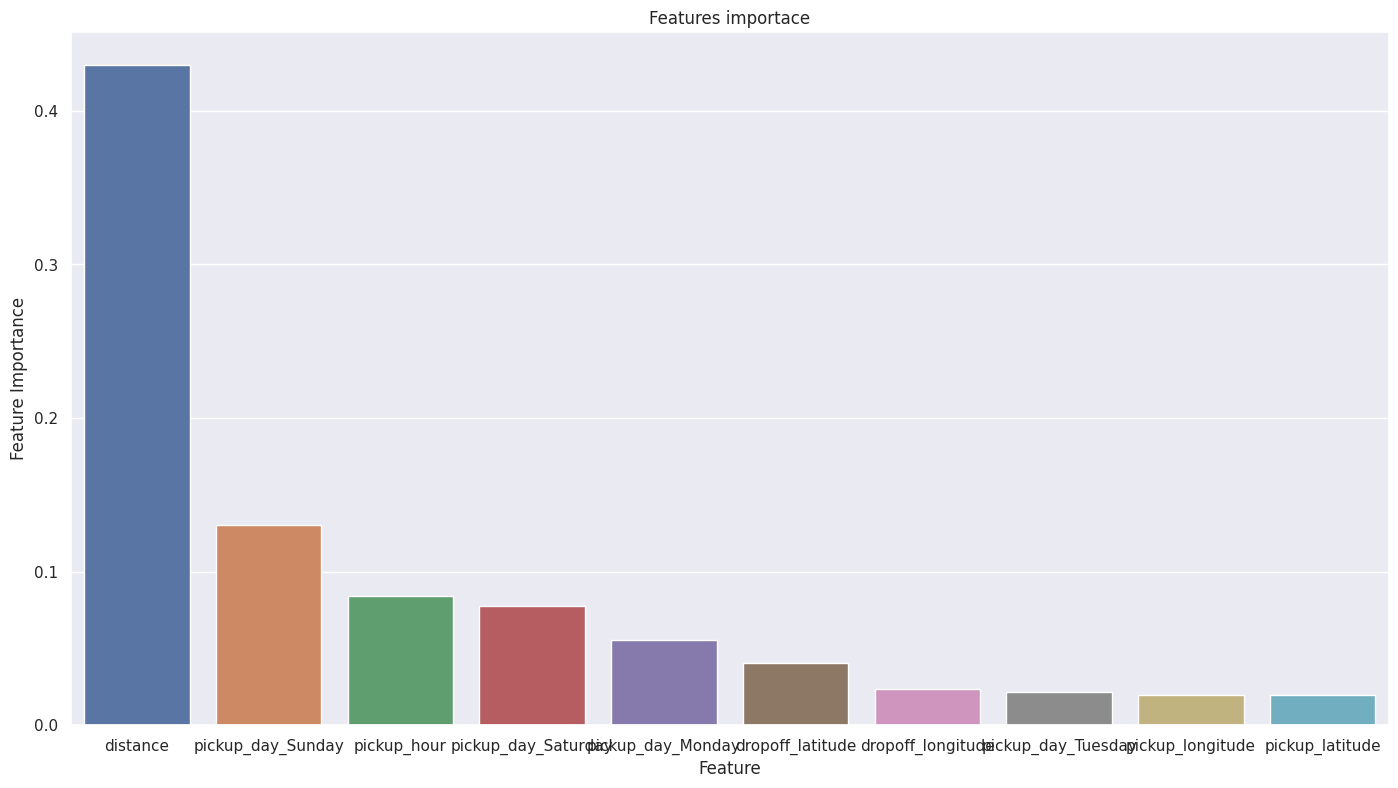

In [ ]:
# Bar Graph of Feature Importance.
plt.figure(figsize=(17,9))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

# Hyper Paramter Of Gradient Boosting.

In [ ]:
# Number of trees
n_estimators = [100,120]

# Maximum depth of trees
max_depth = [5,8,10]

# Minimum number of samples required to split a node
min_samples_split = [50,80]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]


# HYperparameter Grid
param_gb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
'''
# Create an instance of the  GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

# Grid search cv
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_gb,
                       cv = 3, verbose=2, scoring='r2')

gb_grid.fit(X_train,y_train)


Note:- my system is not working well on the grid search cv of gradient boosting model beacause gradient boosting grid search cv is high level process.

'''

"\n# Create an instance of the  GradientBoostingRegressor\ngb_model=GradientBoostingRegressor()\n\n# Grid search cv\ngb_grid = GridSearchCV(estimator=gb_model,\n                       param_grid = param_gb,\n                       cv = 3, verbose=2, scoring='r2')\n\ngb_grid.fit(X_train,y_train)\n\n\nNote:- my system is not working well on the grid search cv of gradient boosting model beacause gradient boosting grid search cv is high level process.\n\n"

# Observations:
- We can observe that both the models shows somewhat similar learning rate but with visible differences in error rates. 
- XGBoost training curve on the other hand starts quite low and further improves with the increase in the training size and it too plateau towards the end.
- We can assume the xgboost ml model return best accuracy compare other models.
- Both the models seems to suffer from **high variance** since the training curve error is very less in both the models.
- The large gap at the end also indicates that the model suffers from quite a **low bias** i.e. overfitting the training data.
- Also, both the model's still has potential to decrease and converge towards the training curve by the end.

# <font size='8px'><font color='#FF3206'> <font color='Yellow'> Thanks For Alamabetter